In [53]:
import numpy as np
import scipy as sp
import new_correction as nc
import matplotlib.pyplot as plt
import os

In [54]:
path = '/datadisk/MIME/exp/expData/'
protein_concentrations = [8,40,200,1000]
c = 10
lambda_l1 = 0.1
correction_method = 'none'

In [34]:
logK_sequences_r2, logK_mutations_r2, interactions_r2, significant_positions = nc.logK_inference_exp(path, protein_concentrations, c, lambda_l1, correction_method)

Pool 8, 8:
	Pruned 239770.0 of 1917401.0 sequences
	STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
	 number of possible interactions: 127764.0
	 number of inferred interactions: 1365
Pool 8, 40:
	Pruned 238177.0 of 1981173.0 sequences
	STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
	 number of possible interactions: 127764.0
	 number of inferred interactions: 1748
Pool 8, 200:
	Pruned 249199.0 of 2165588.0 sequences
	STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
	 number of possible interactions: 127764.0
	 number of inferred interactions: 2081
Pool 8, 1000:
	Pruned 215419.0 of 1805121.0 sequences


KeyboardInterrupt: 

In [ ]:
savepath = f'/datadisk/MIME/exp/expData/Inference_c_{c}_lambda_{lambda_l1}_{correction_method}/'
# make directory if it doesn't exist
import os
os.makedirs(savepath, exist_ok=True)
i = 0
for protein_concentration1 in protein_concentrations:
    for protein_concentration2 in protein_concentrations:
        # save the logK_sequences_r2
        np.savez(f'{savepath}logK_sequences_r2_{protein_concentration1}_{protein_concentration2}.npz', logK_sequences_r2=logK_sequences_r2[i])
        # save the logK_mutations_r2
        np.savez(f'{savepath}logK_mutations_r2_{protein_concentration1}_{protein_concentration2}.npz', logK_mutations_r2=logK_mutations_r2[i])
        # save the interactions_r2
        np.savez(f'{savepath}interactions_r2_{protein_concentration1}_{protein_concentration2}.npz', interactions_r2=interactions_r2[i])
        i += 1

In [55]:
savepath = f'/datadisk/MIME/exp/expData/Inference_c_{c}_lambda_{lambda_l1}_{correction_method}/'
logK_sequences_r2 = []
logK_mutations_r2 = []
interactions_r2 = []
for protein_concentration1 in protein_concentrations:
    for protein_concentration2 in protein_concentrations:
        # load the logK_sequences_r2
        logK_sequences_r2.append(np.load(f'{savepath}logK_sequences_r2_{protein_concentration1}_{protein_concentration2}.npz')['logK_sequences_r2'])
        # load the logK_mutations_r2
        logK_mutations_r2.append(np.load(f'{savepath}logK_mutations_r2_{protein_concentration1}_{protein_concentration2}.npz')['logK_mutations_r2'])
        # load the interactions_r2
        interactions_r2.append(np.load(f'{savepath}interactions_r2_{protein_concentration1}_{protein_concentration2}.npz')['interactions_r2'])

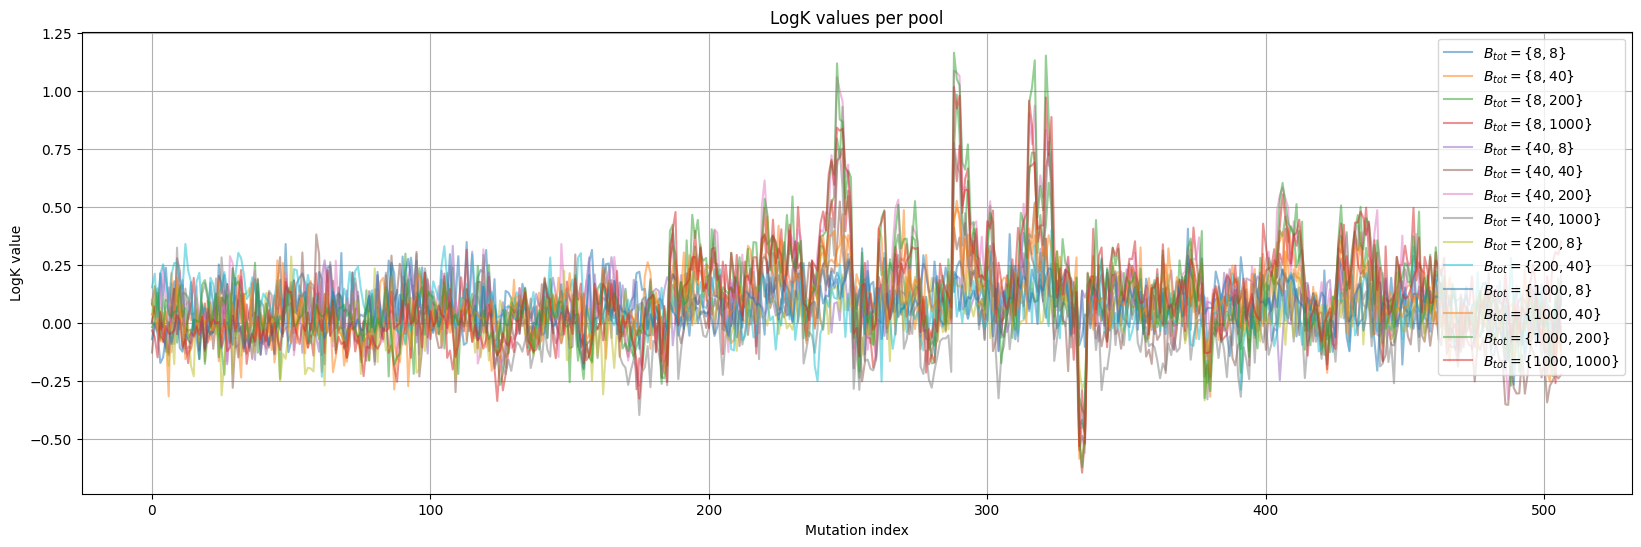

In [56]:
# line plot per pool the logK values
plt.figure(figsize=(20, 6))
for i in range(len(protein_concentrations)**2):
    if i == 10 or i == 11:
        continue
    plt.plot(logK_mutations_r2[i], label=f'Pool {i+1}', alpha=0.5)

# add ticks where logK_mutations_r2 = nan
for i in range(len(protein_concentrations)**2):
    if i == 10 or i == 11:
        continue
    #plot an x at positions where logK_mutations_r2 = nan
    plt.scatter(np.where(np.isnan(logK_mutations_r2[i]))[0], np.zeros(len(np.where(np.isnan(logK_mutations_r2[i]))[0])), marker='x', color='red', alpha=0.5, s=10)
plt.title('LogK values per pool')
plt.xlabel('Mutation index')
plt.ylabel('LogK value')
legend = []
for b1 in protein_concentrations:
    for b2 in protein_concentrations:
        if (b1 == 200 and b2 == 200) or (b1 == 200 and b2 == 1000):
            continue
        legend.append('$B_{tot} = \{'+ str(b1)+', '+ str(b2)+'\}$')
plt.legend(legend)
plt.grid()
plt.show()

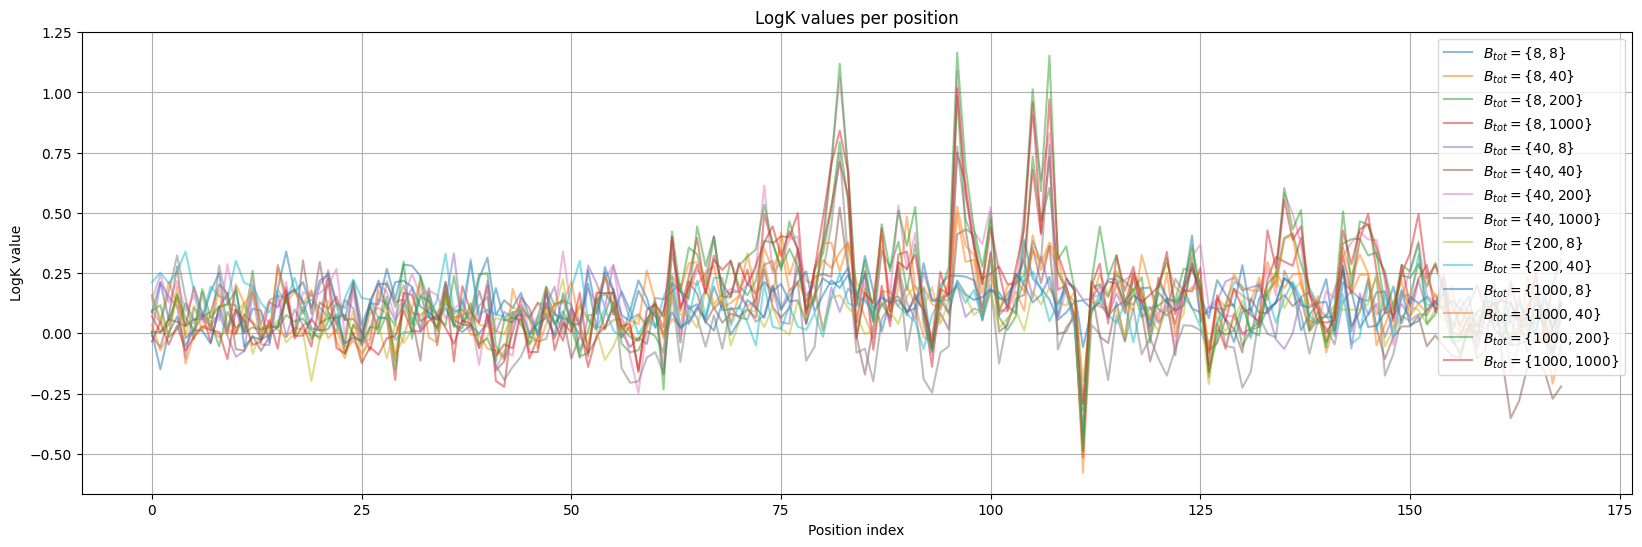

In [57]:
# 3 indices are always mutations of one position
# take only the maximum logK value for each position
# plot the logK values for each position
plt.figure(figsize=(20, 6))
for i,pool in enumerate(logK_mutations_r2):
    if i == 10 or i == 11:
        continue
    logK_muts = pool
    logK_pos = np.zeros(int(logK_muts.shape[0]/3))
    for i in range(len(logK_pos)):
        logK_pos[i] = np.max(logK_muts[i*3:i*3+2])

    # print(logK_pos.shape)
    plt.plot(logK_pos, label=f'Pool {i+1}', alpha=0.5)
# add ticks where logK_pos = nan
for i in range(len(logK_pos)):
    if np.isnan(logK_pos[i]):
        #plot an x at positions where logK_pos = nan
        plt.scatter(i, 0, marker='x', color='red', alpha=0.5, s=10)

plt.title('LogK values per position')
plt.xlabel('Position index')
plt.ylabel('LogK value')
legend = []
for b1 in protein_concentrations:
    for b2 in protein_concentrations:
        if (b1 == 200 and b2 == 200) or (b1 == 200 and b2 == 1000):
            continue
        legend.append('$B_{tot} = \{'+ str(b1)+', '+ str(b2)+'\}$')
plt.legend(legend)
plt.grid()
plt.show()


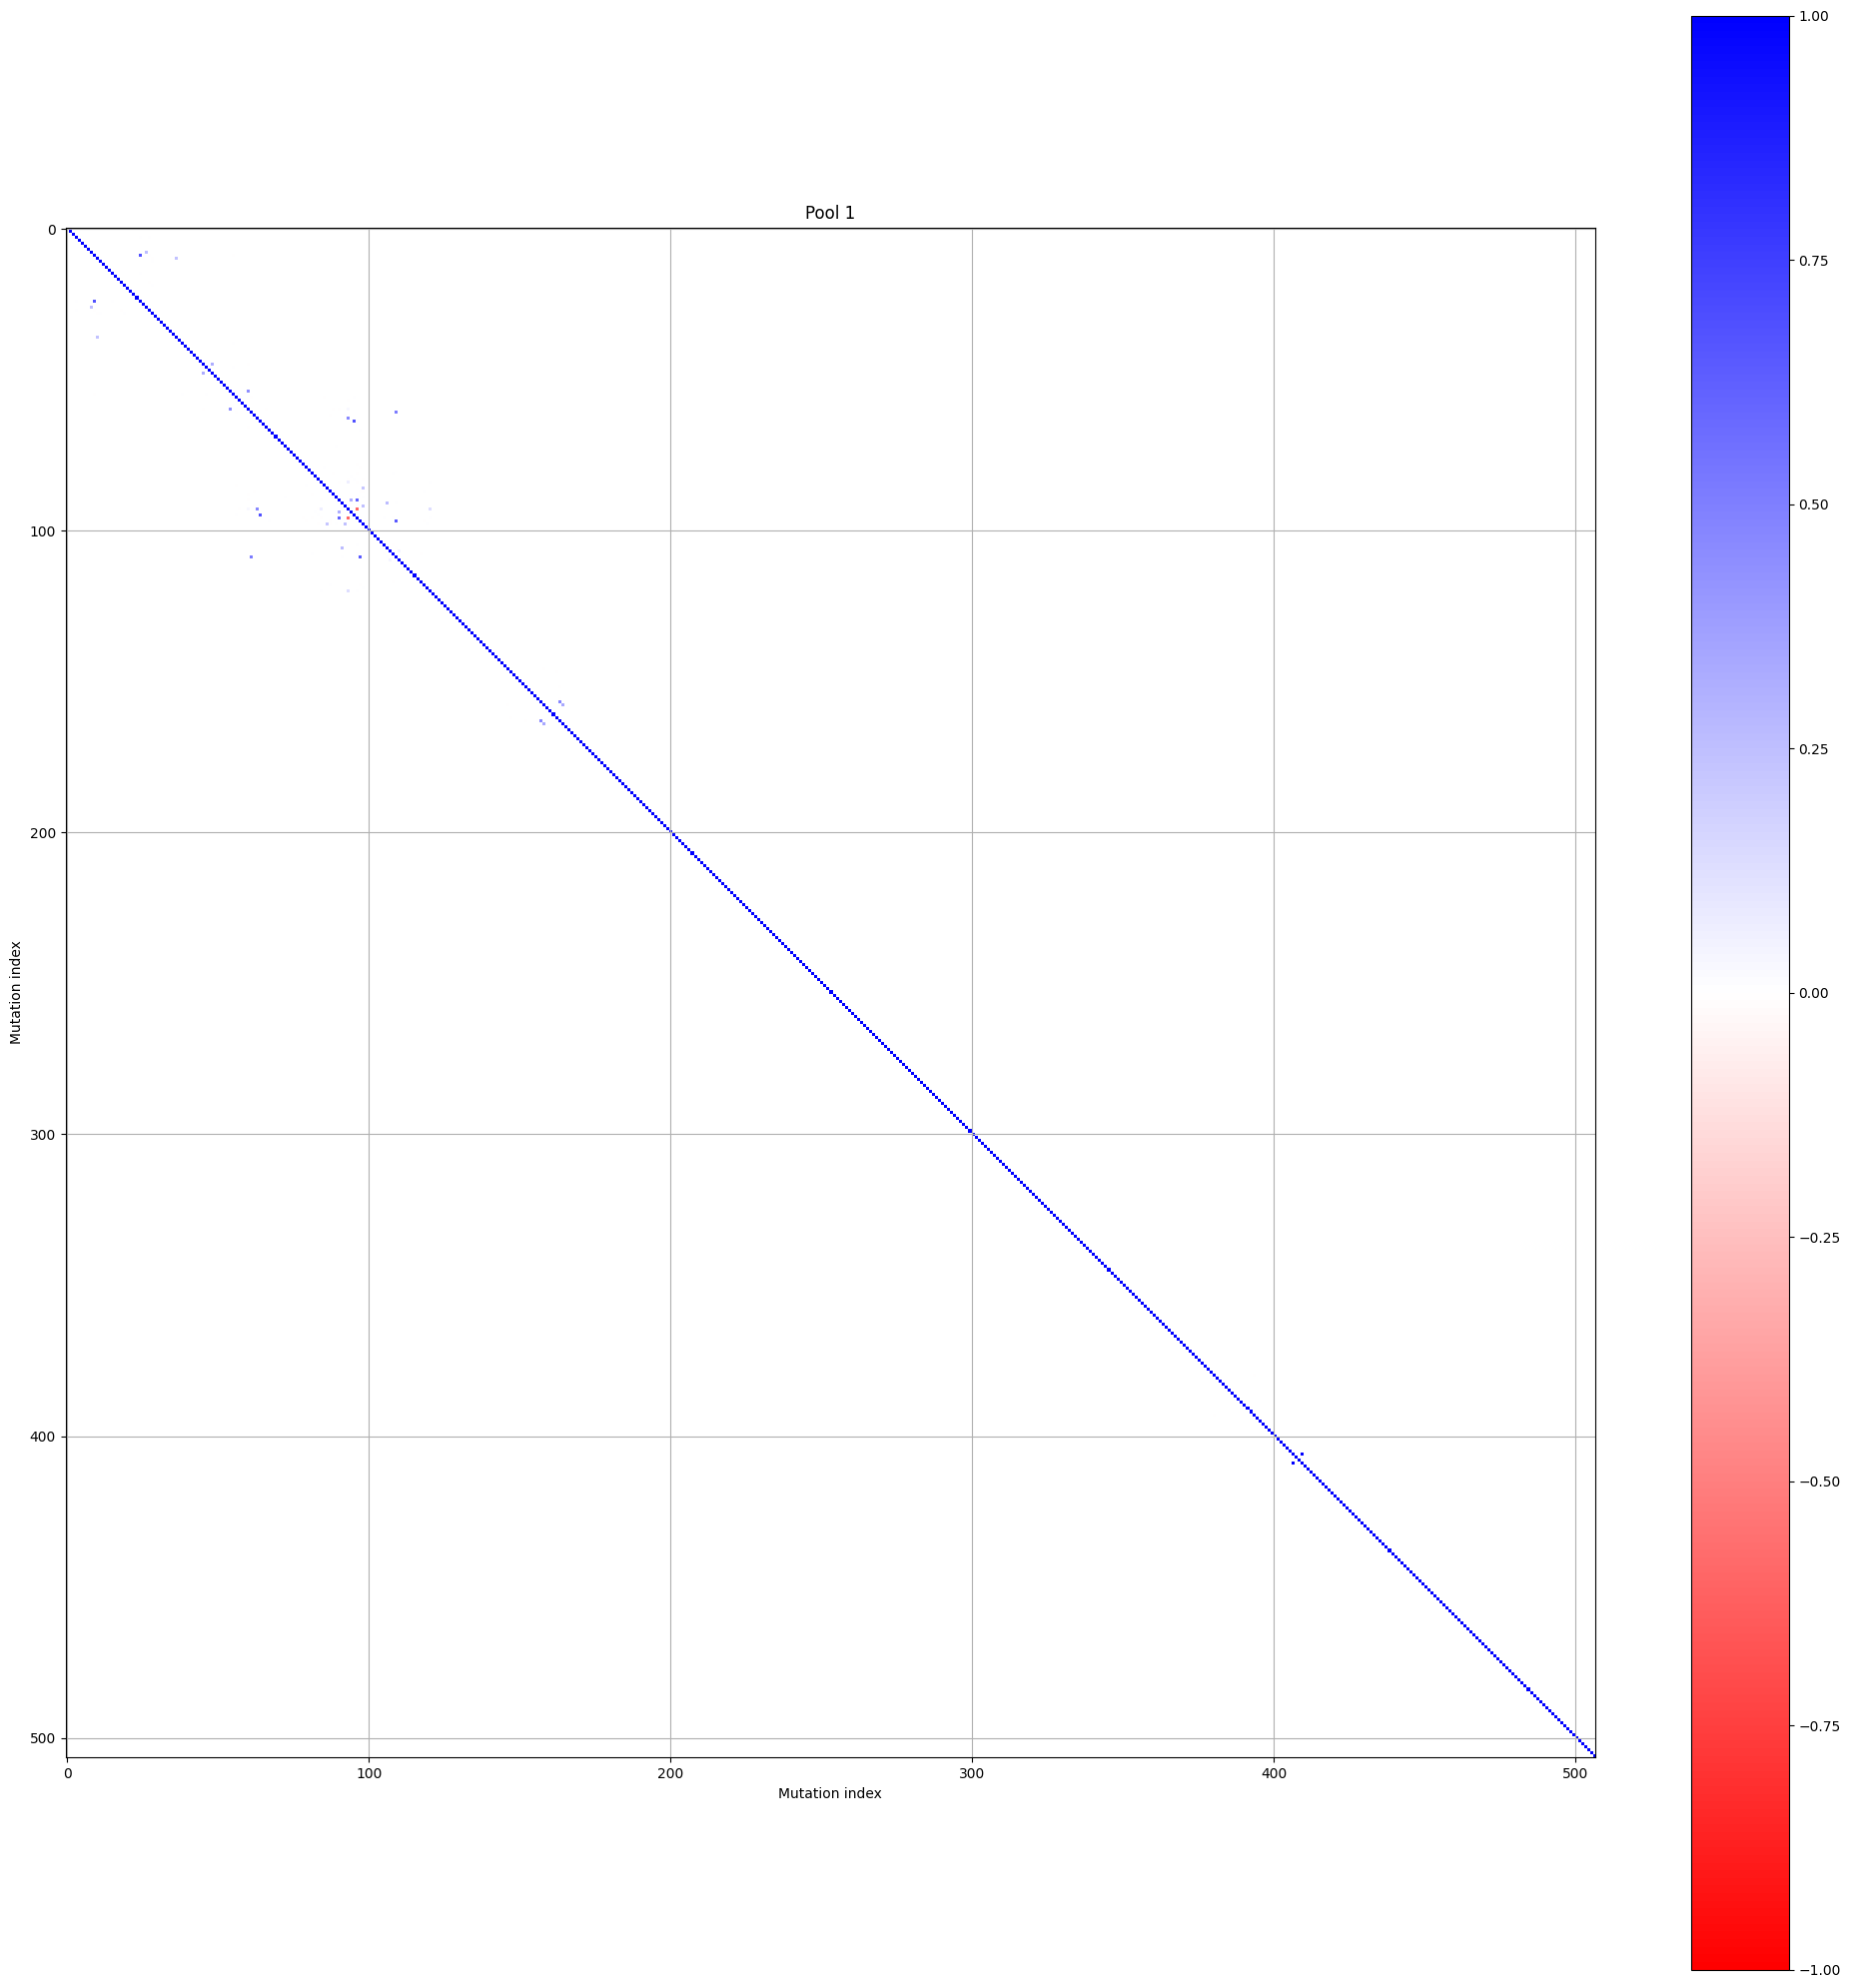

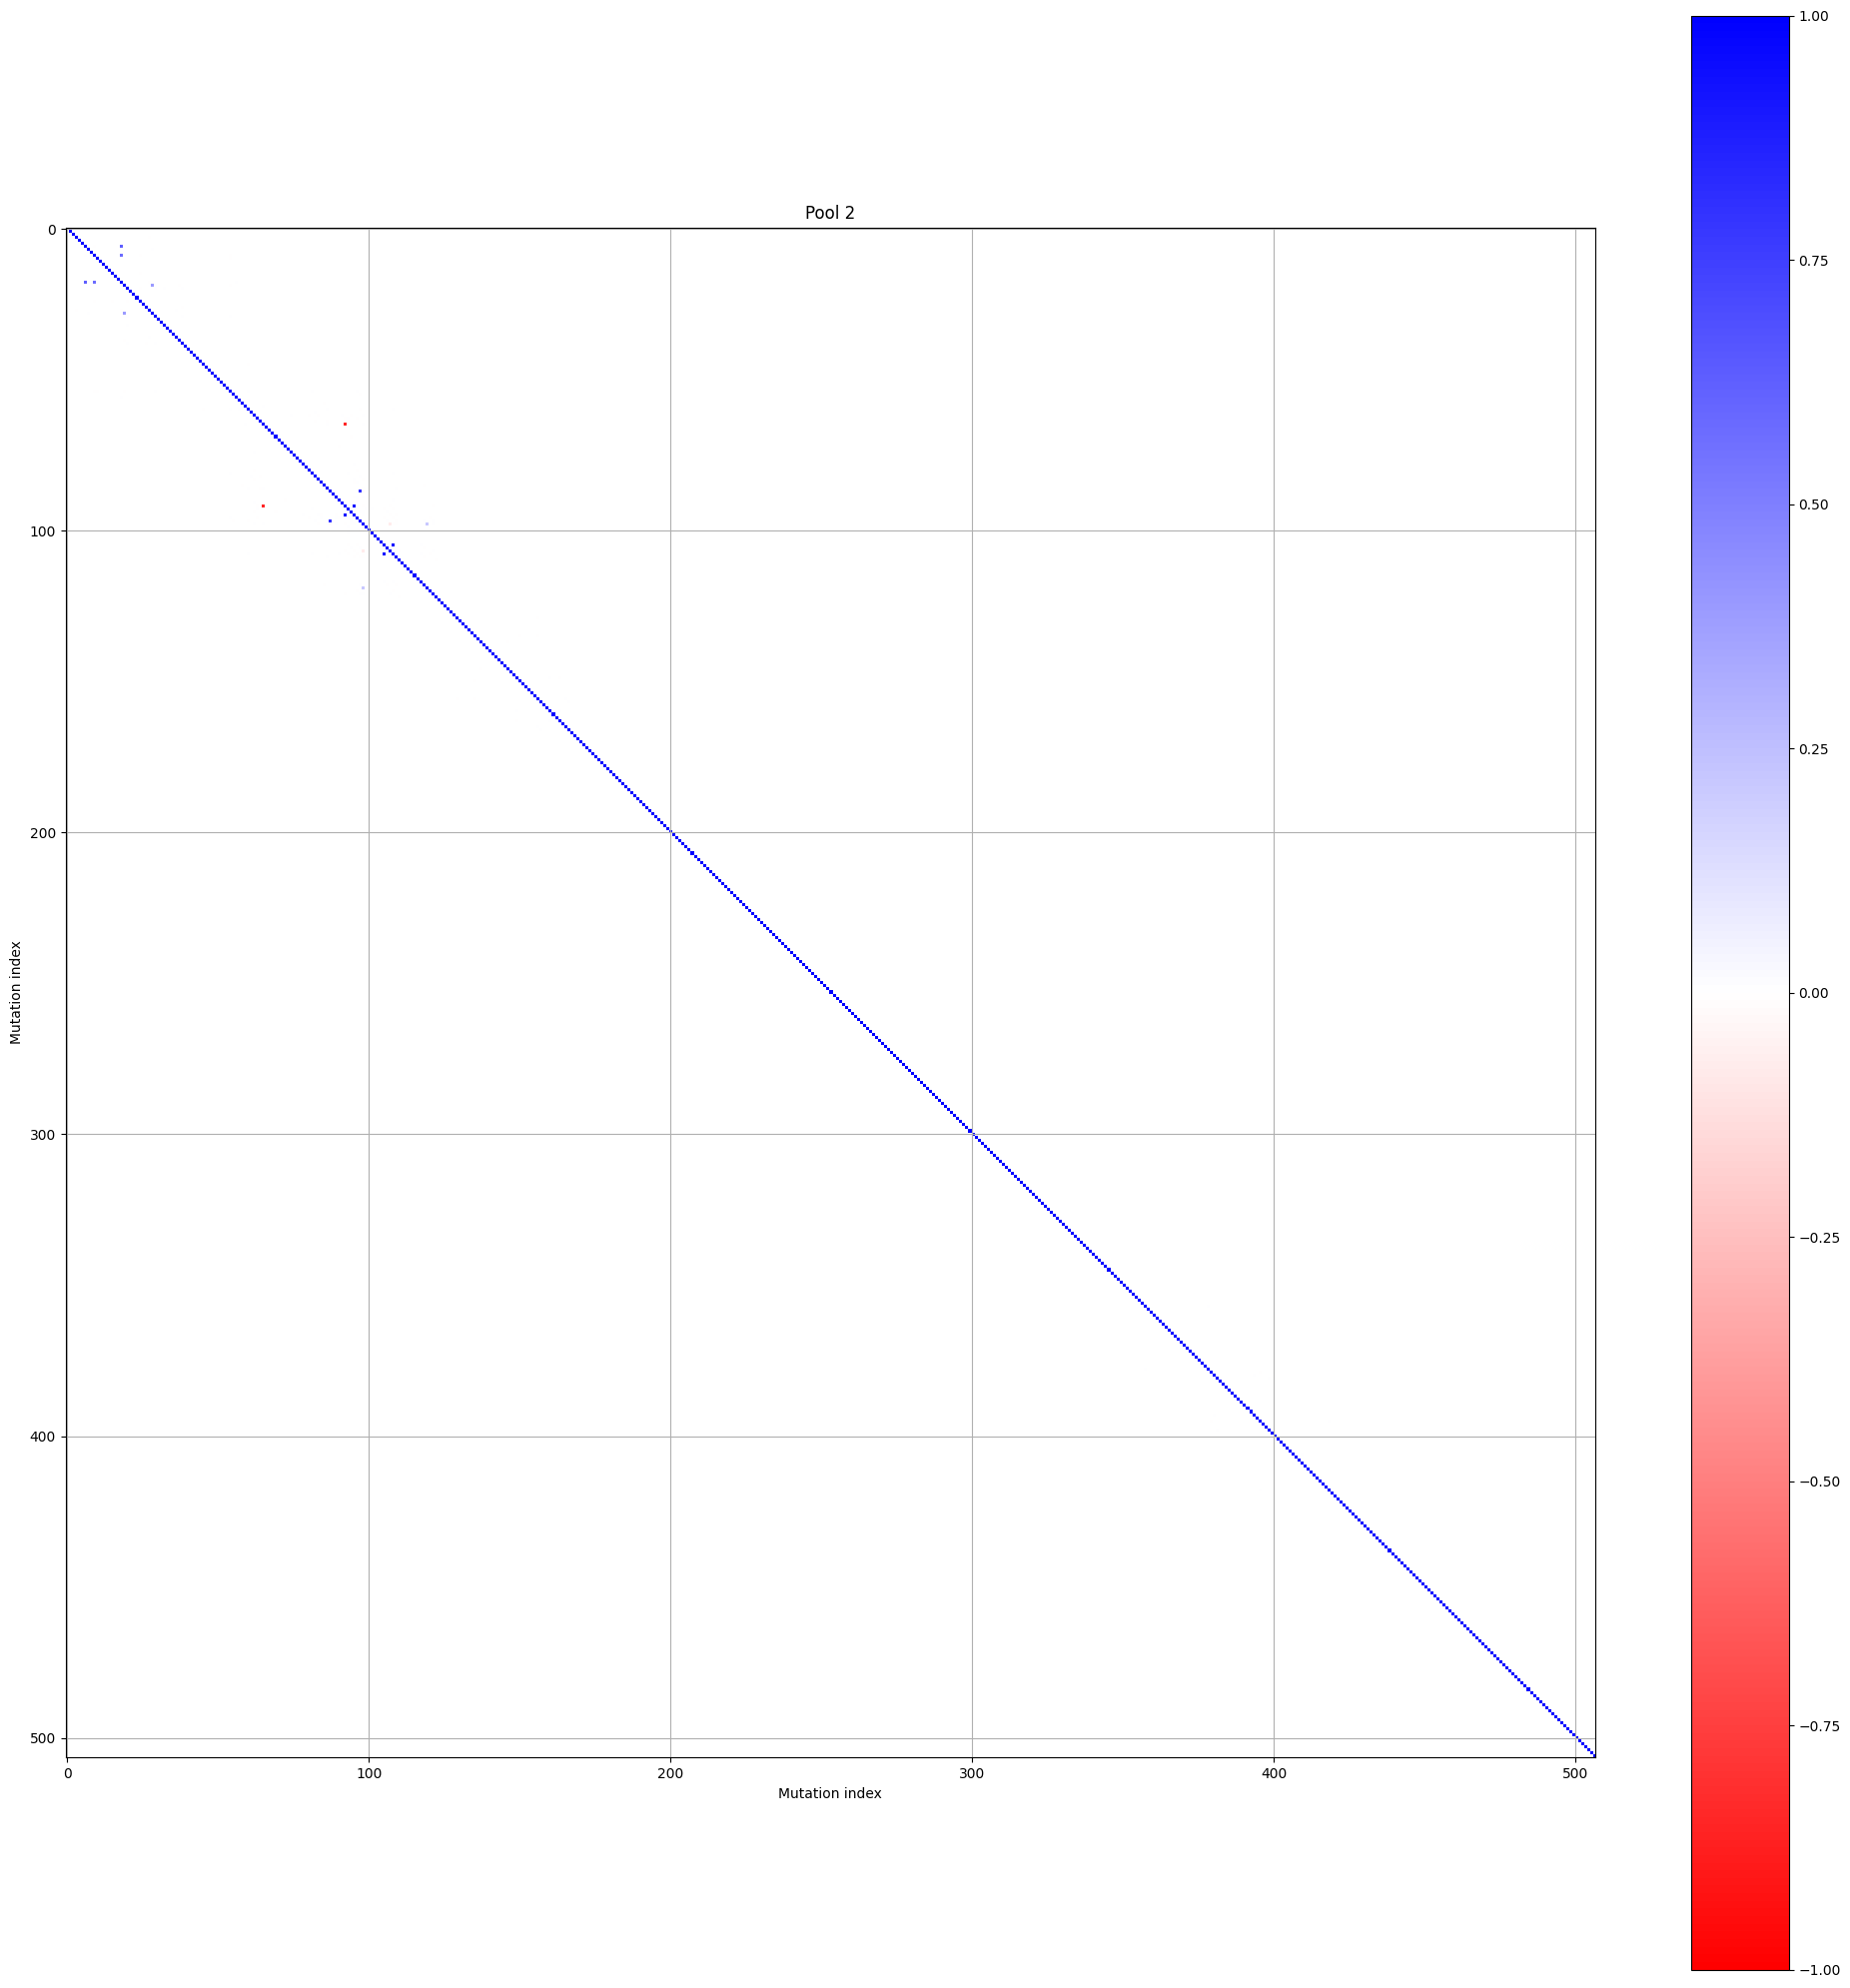

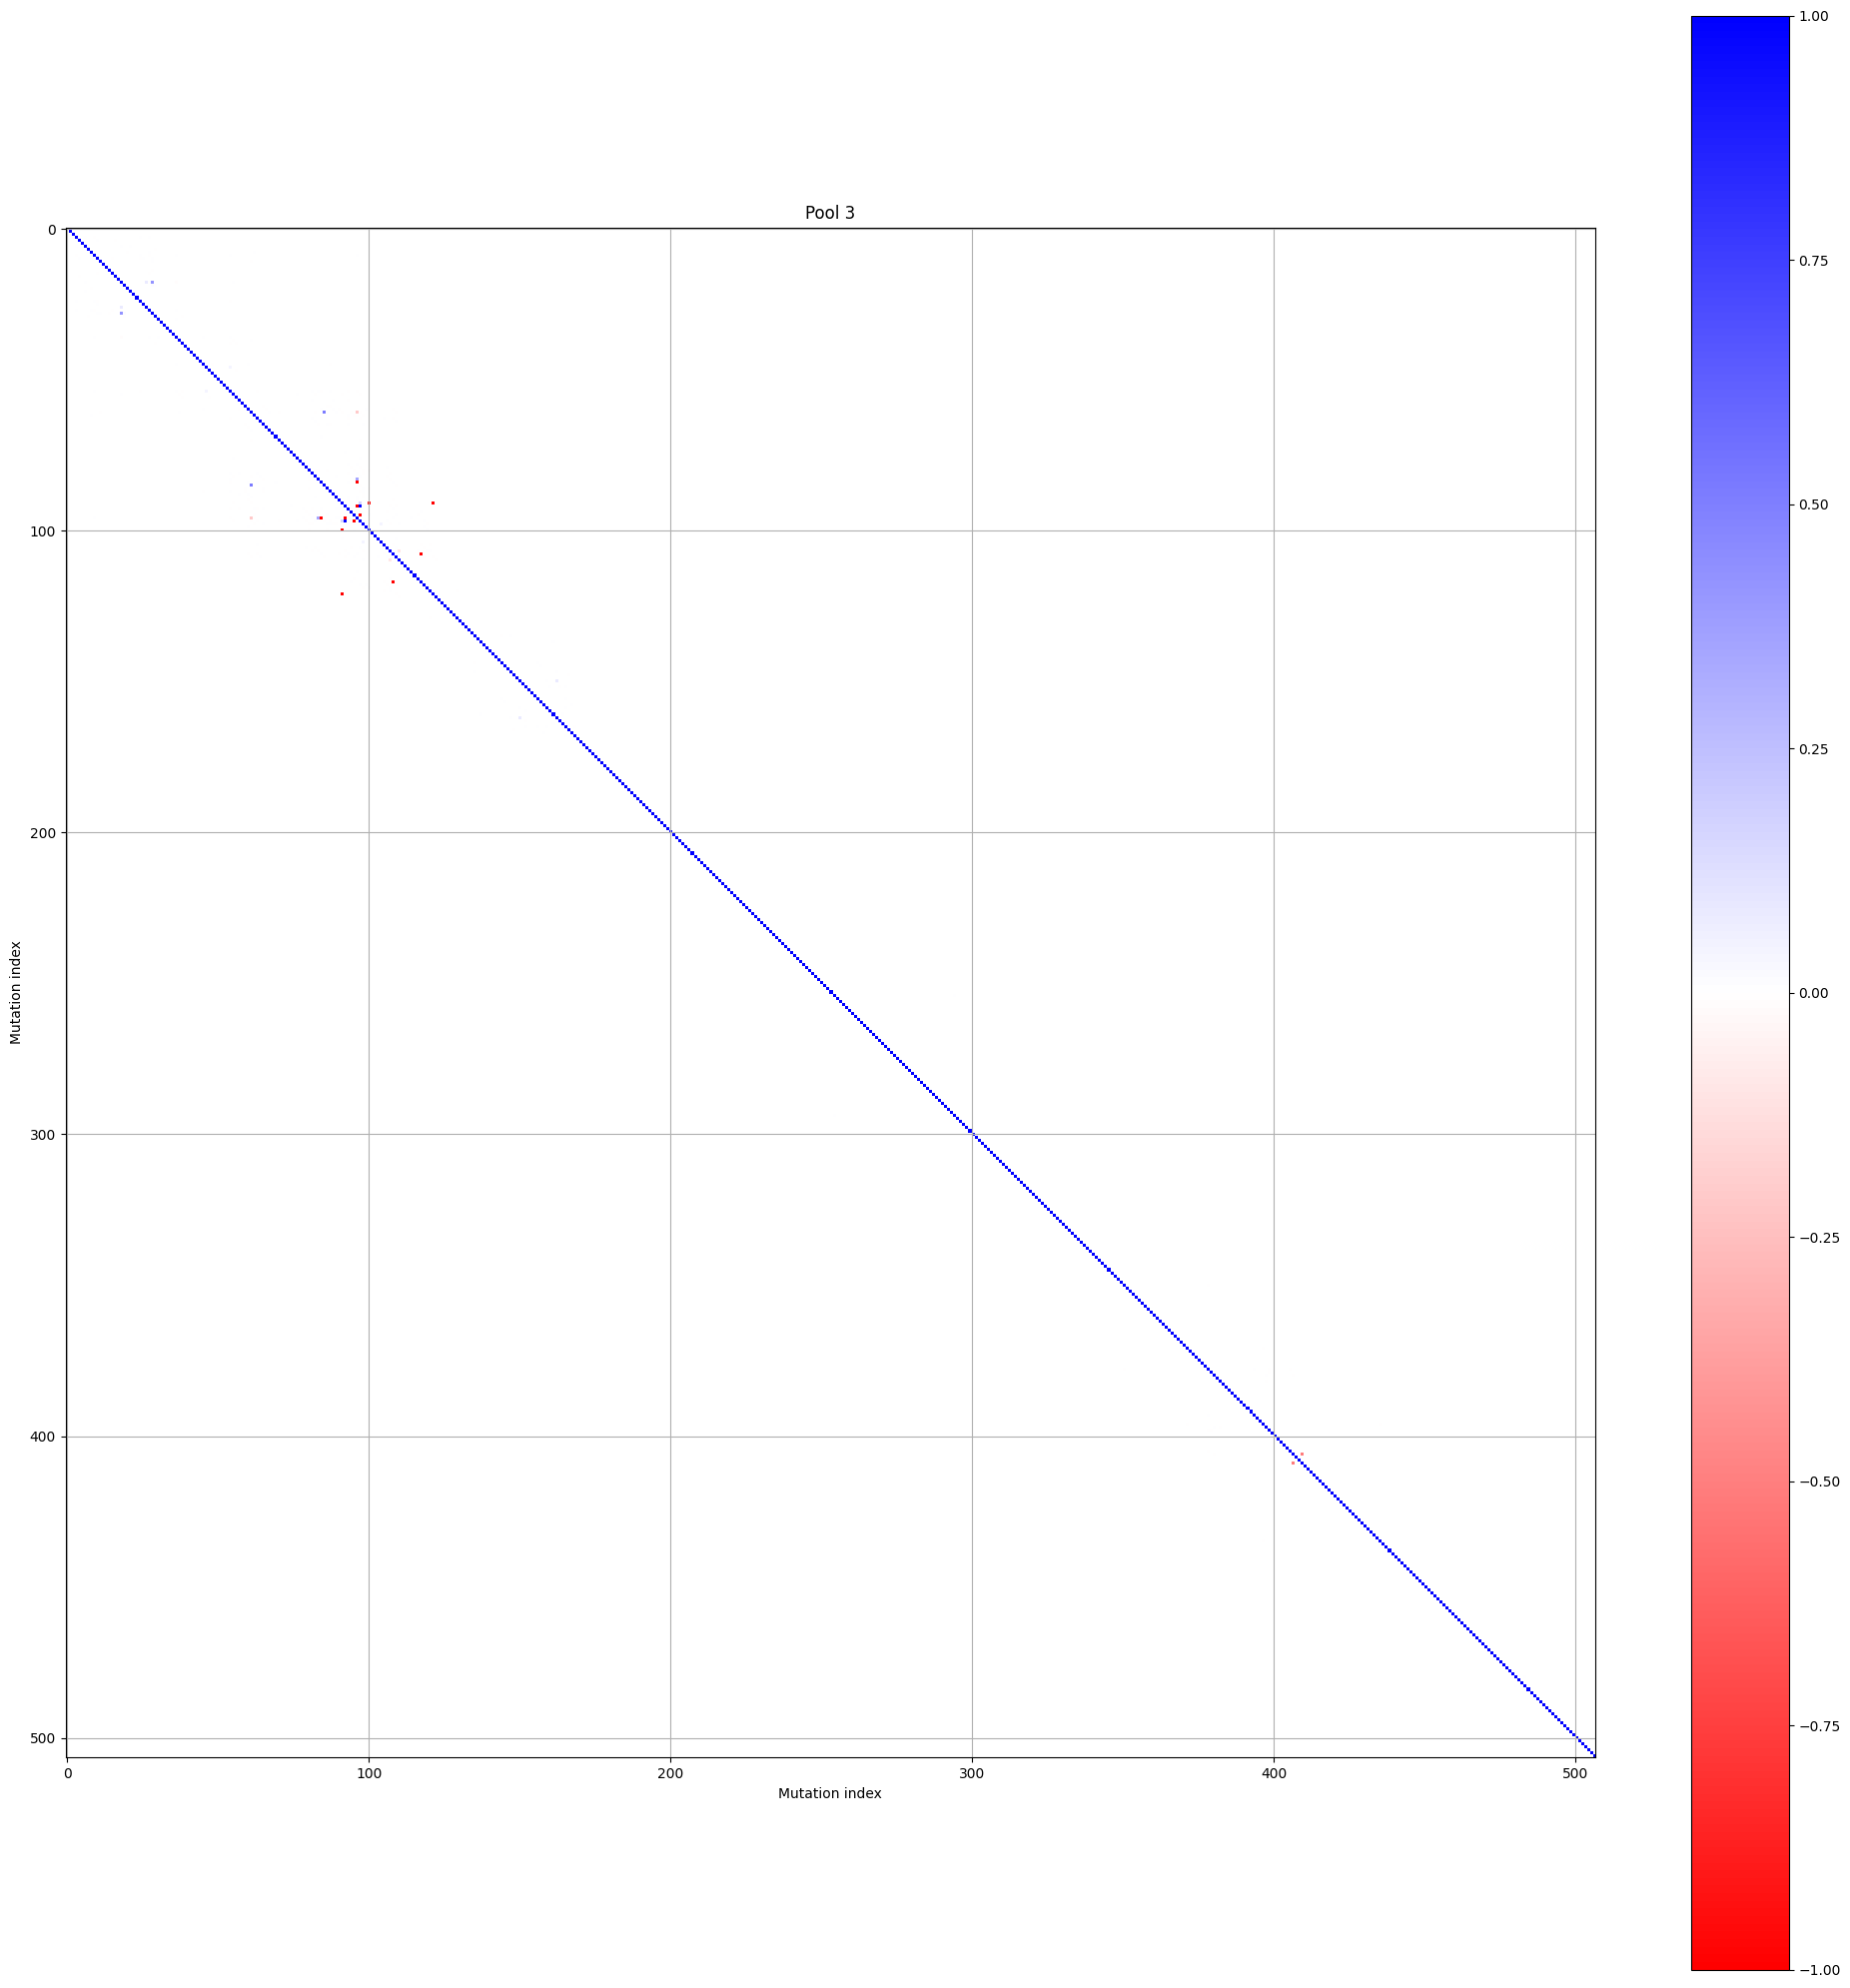

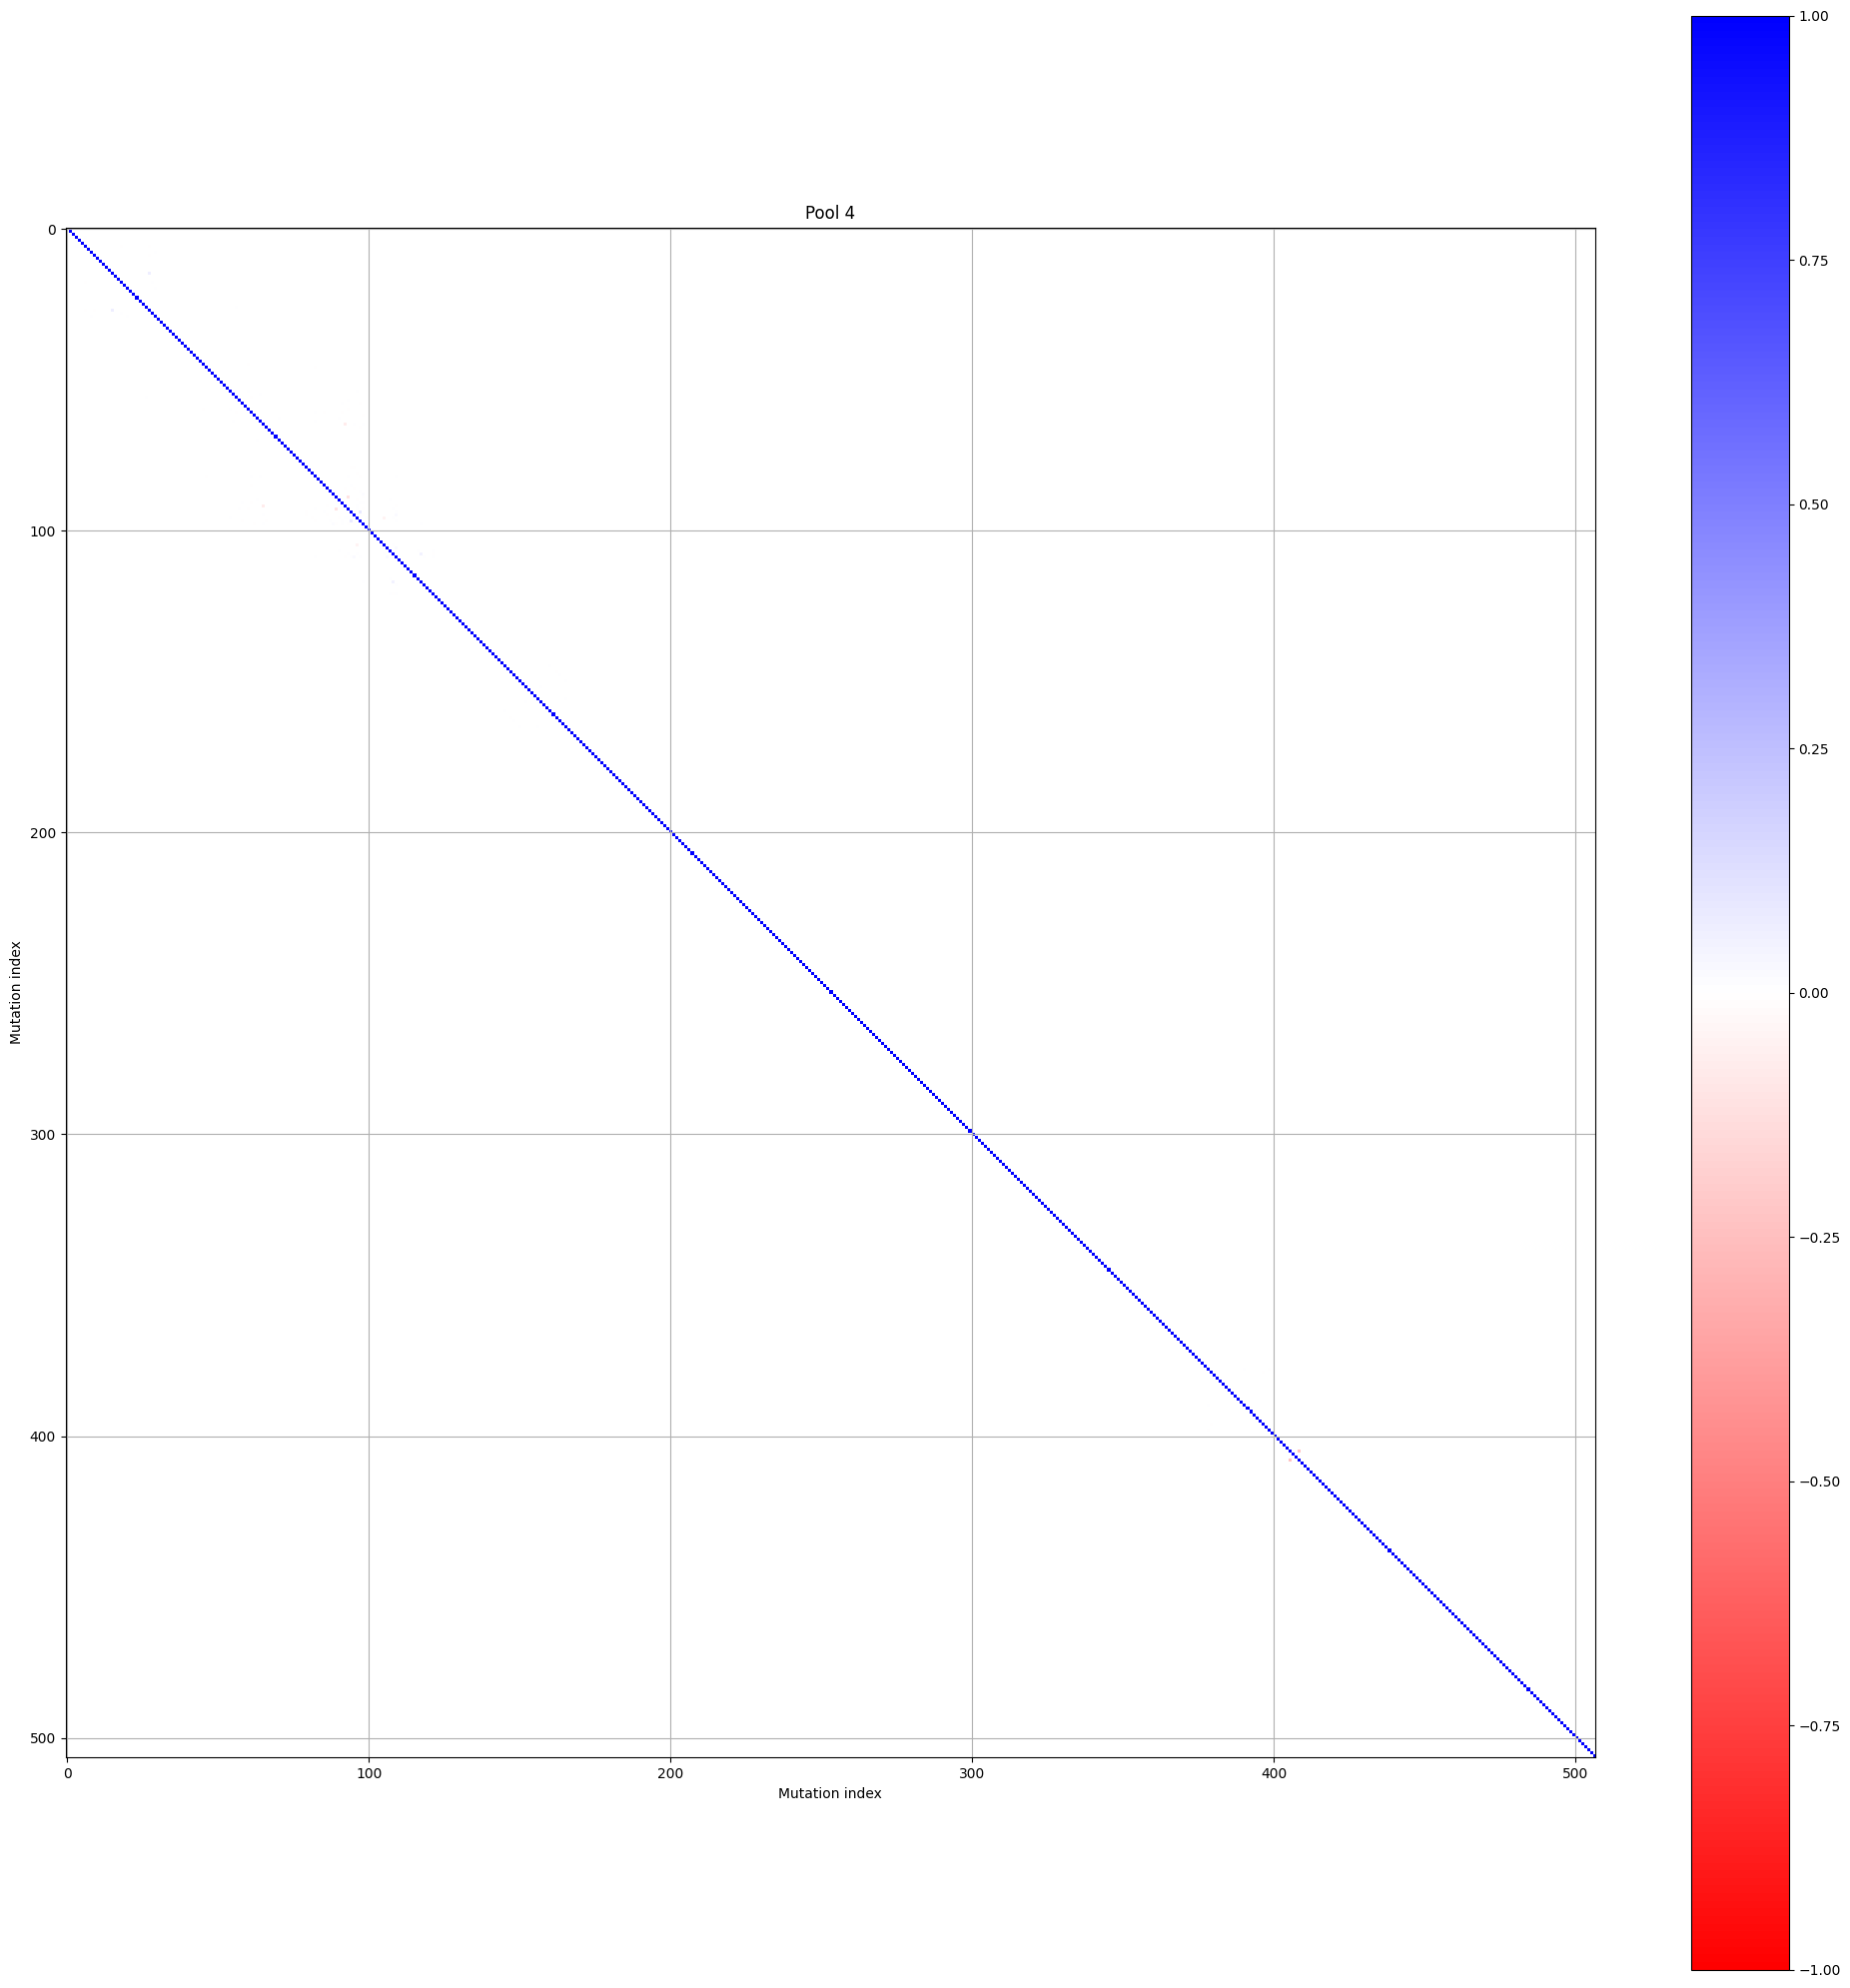

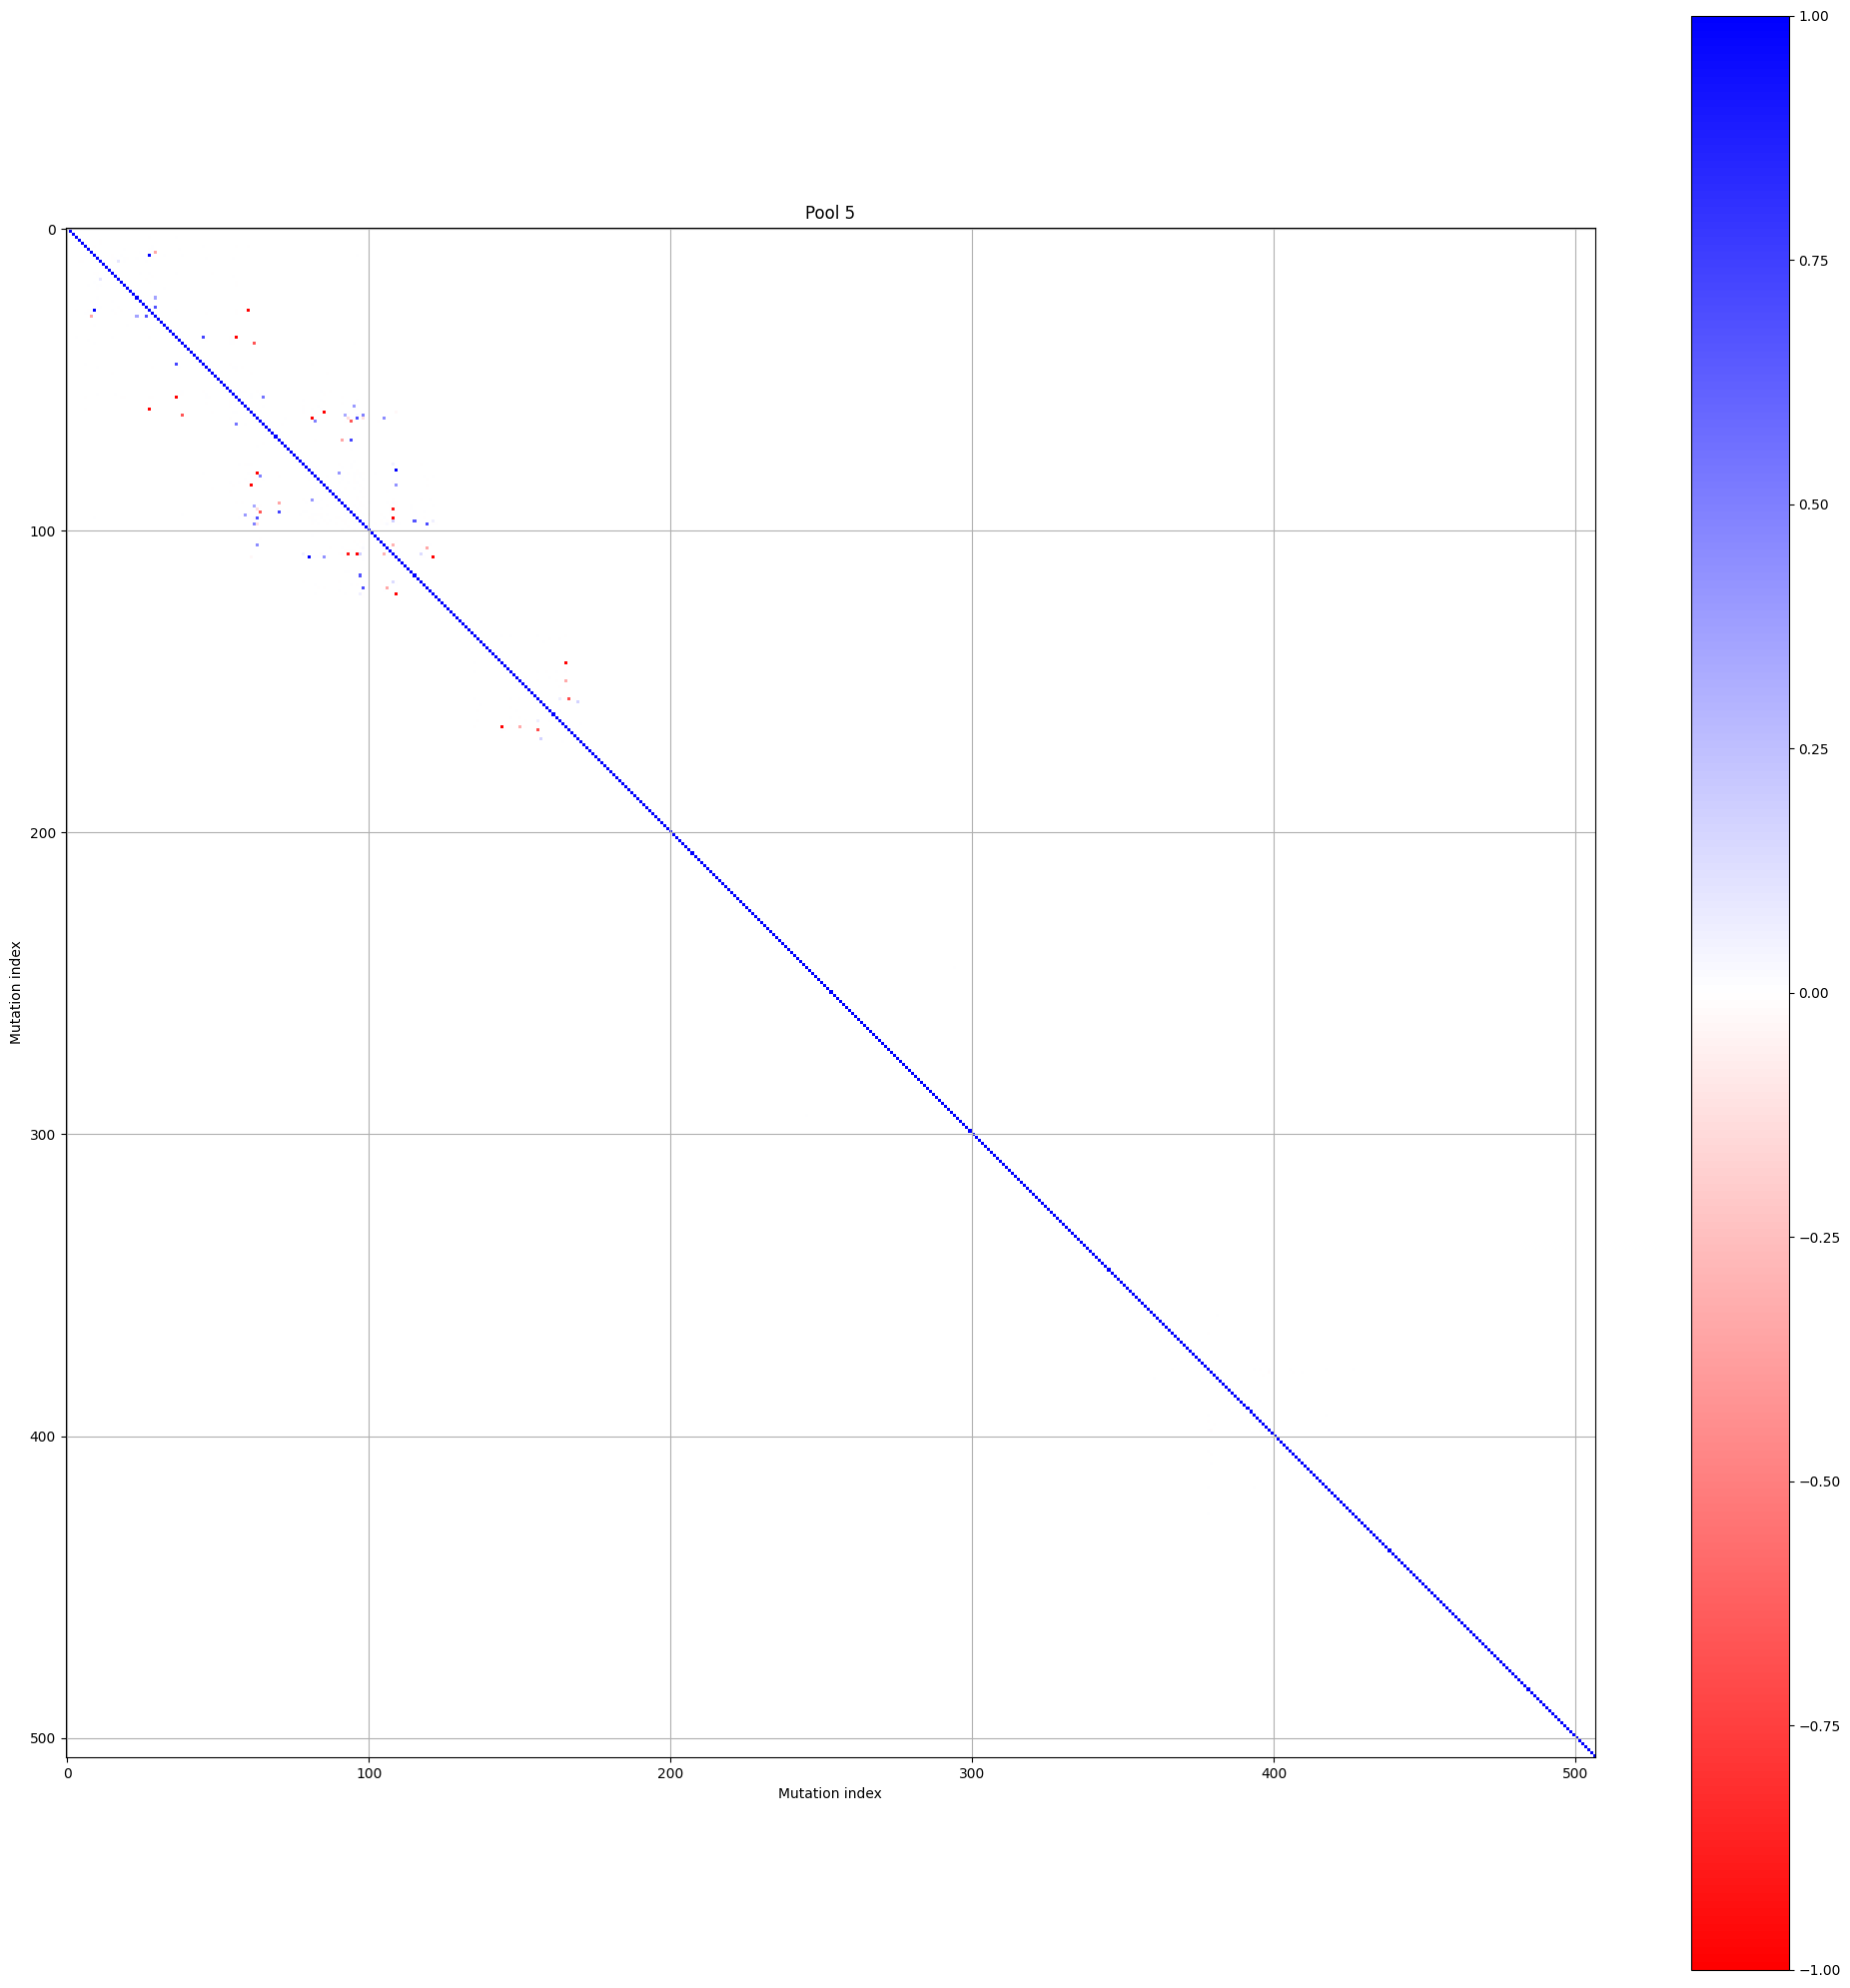

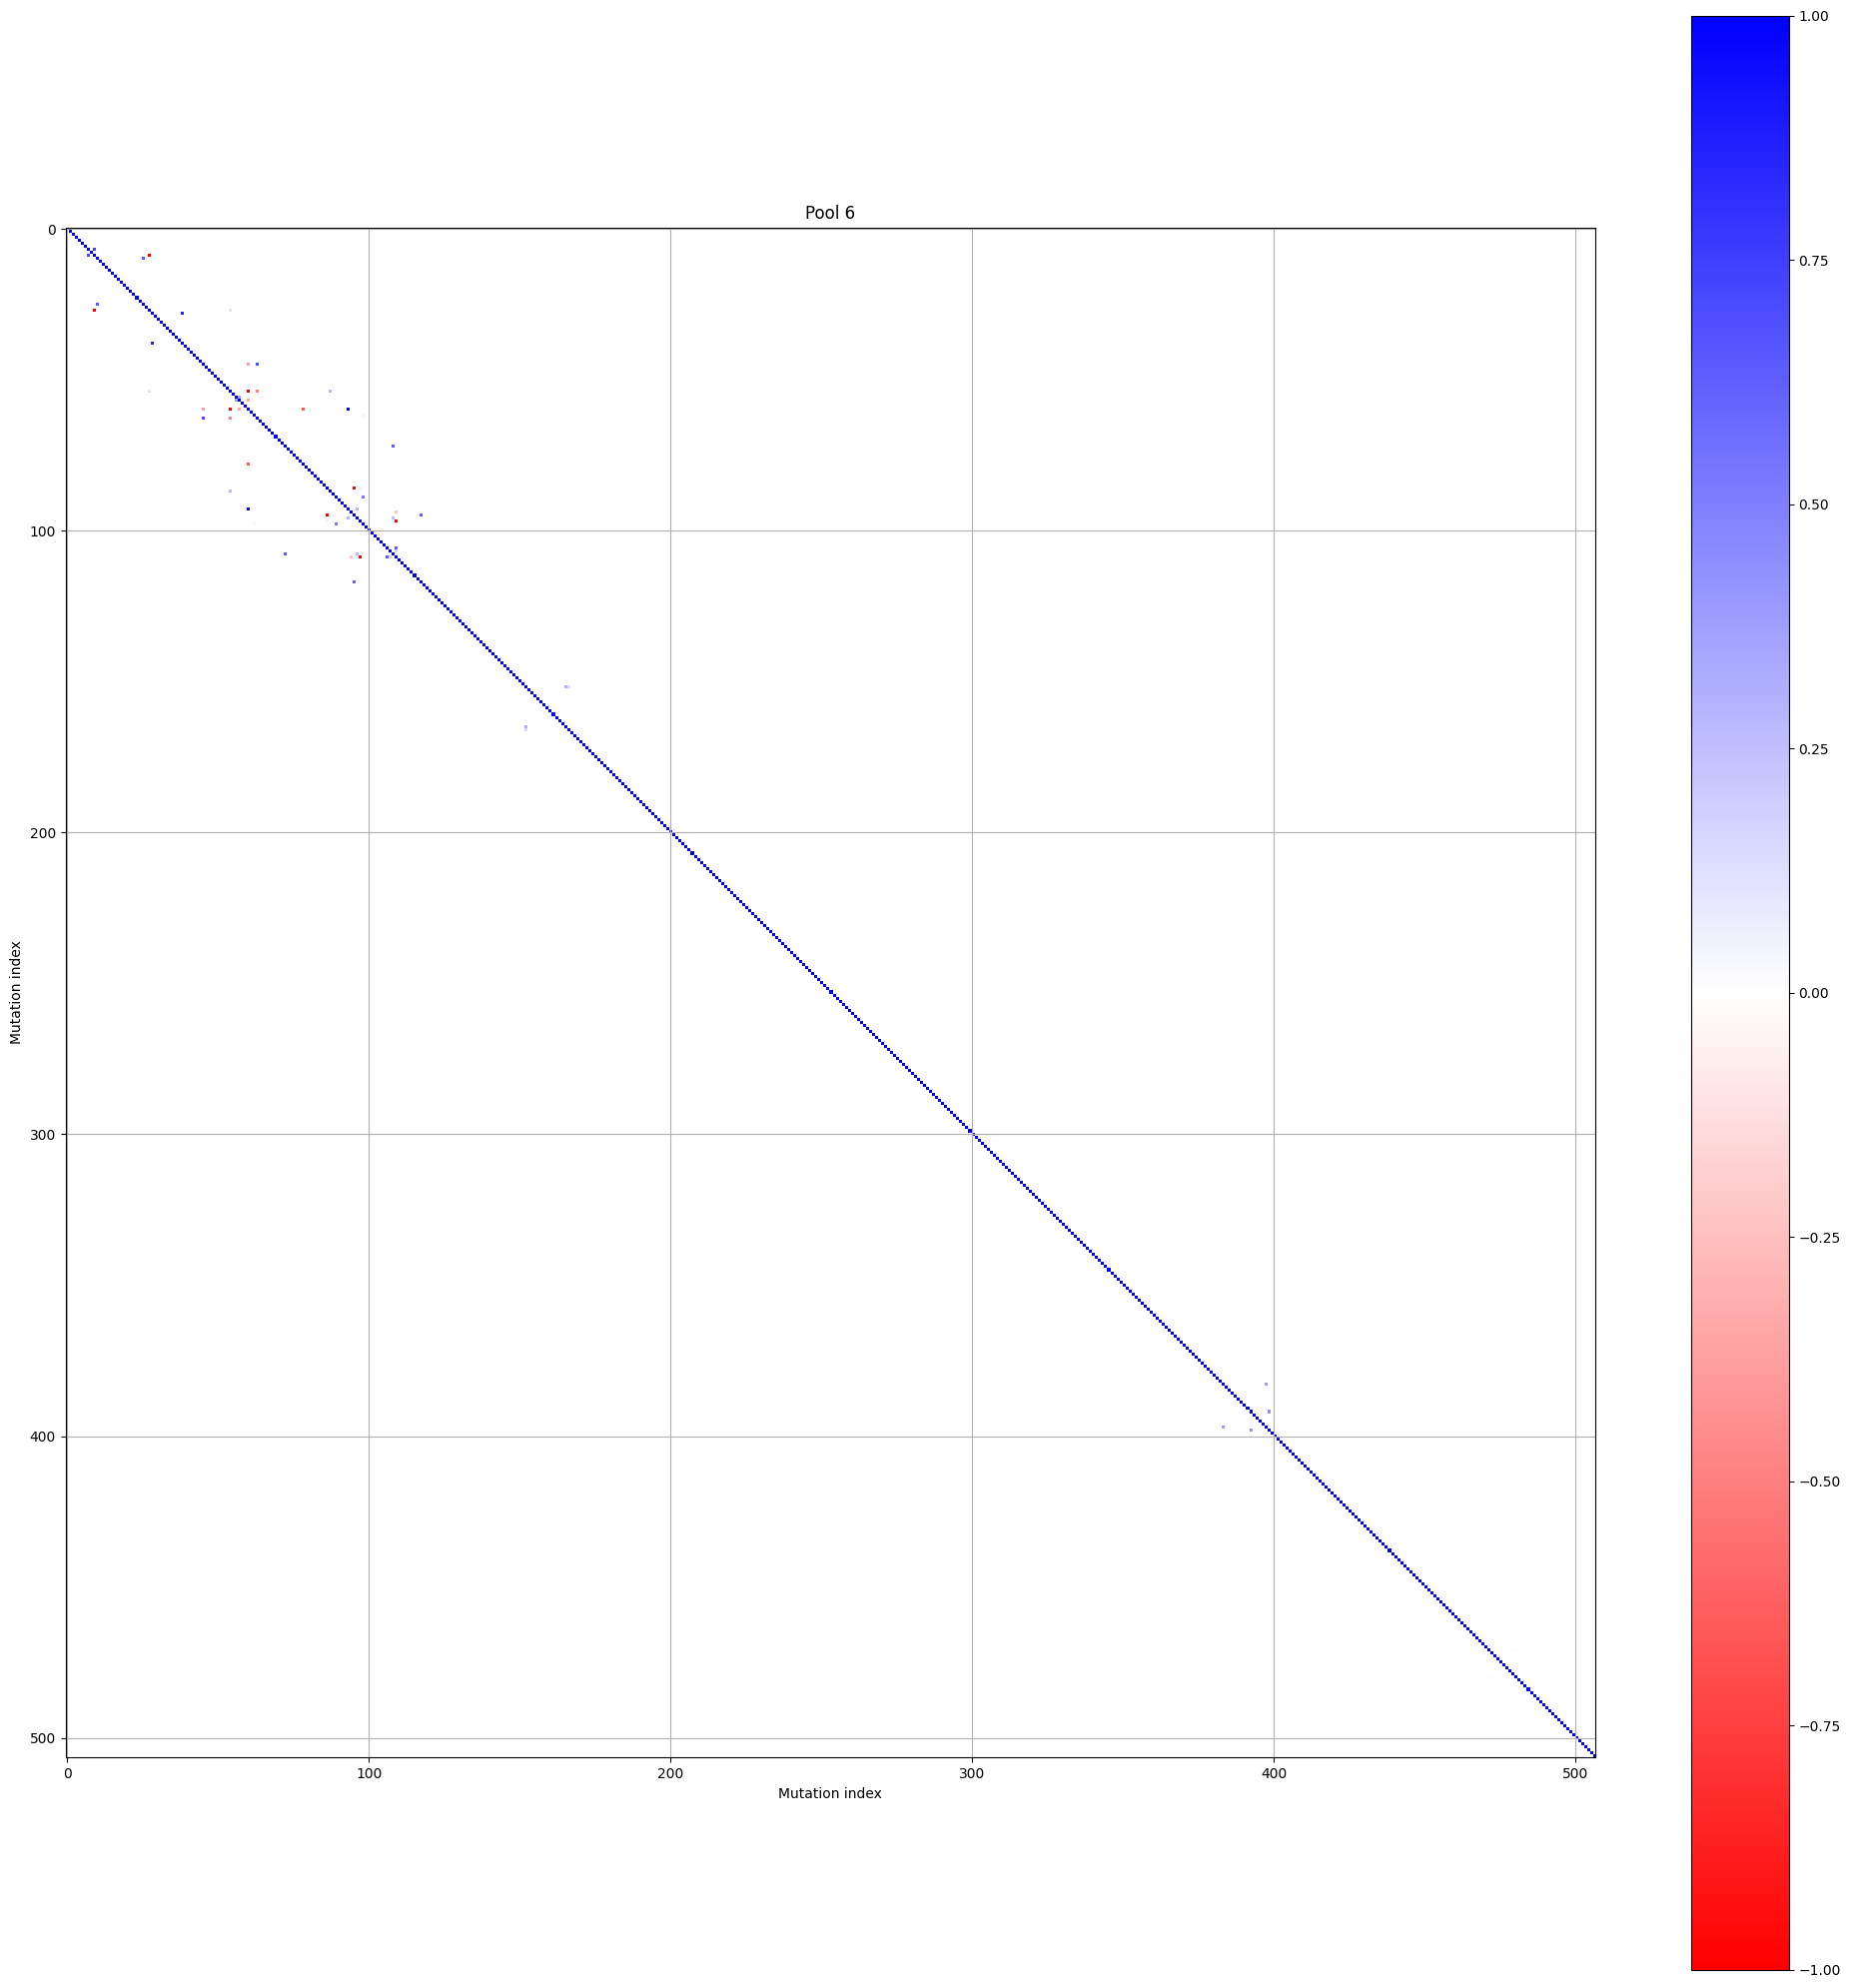

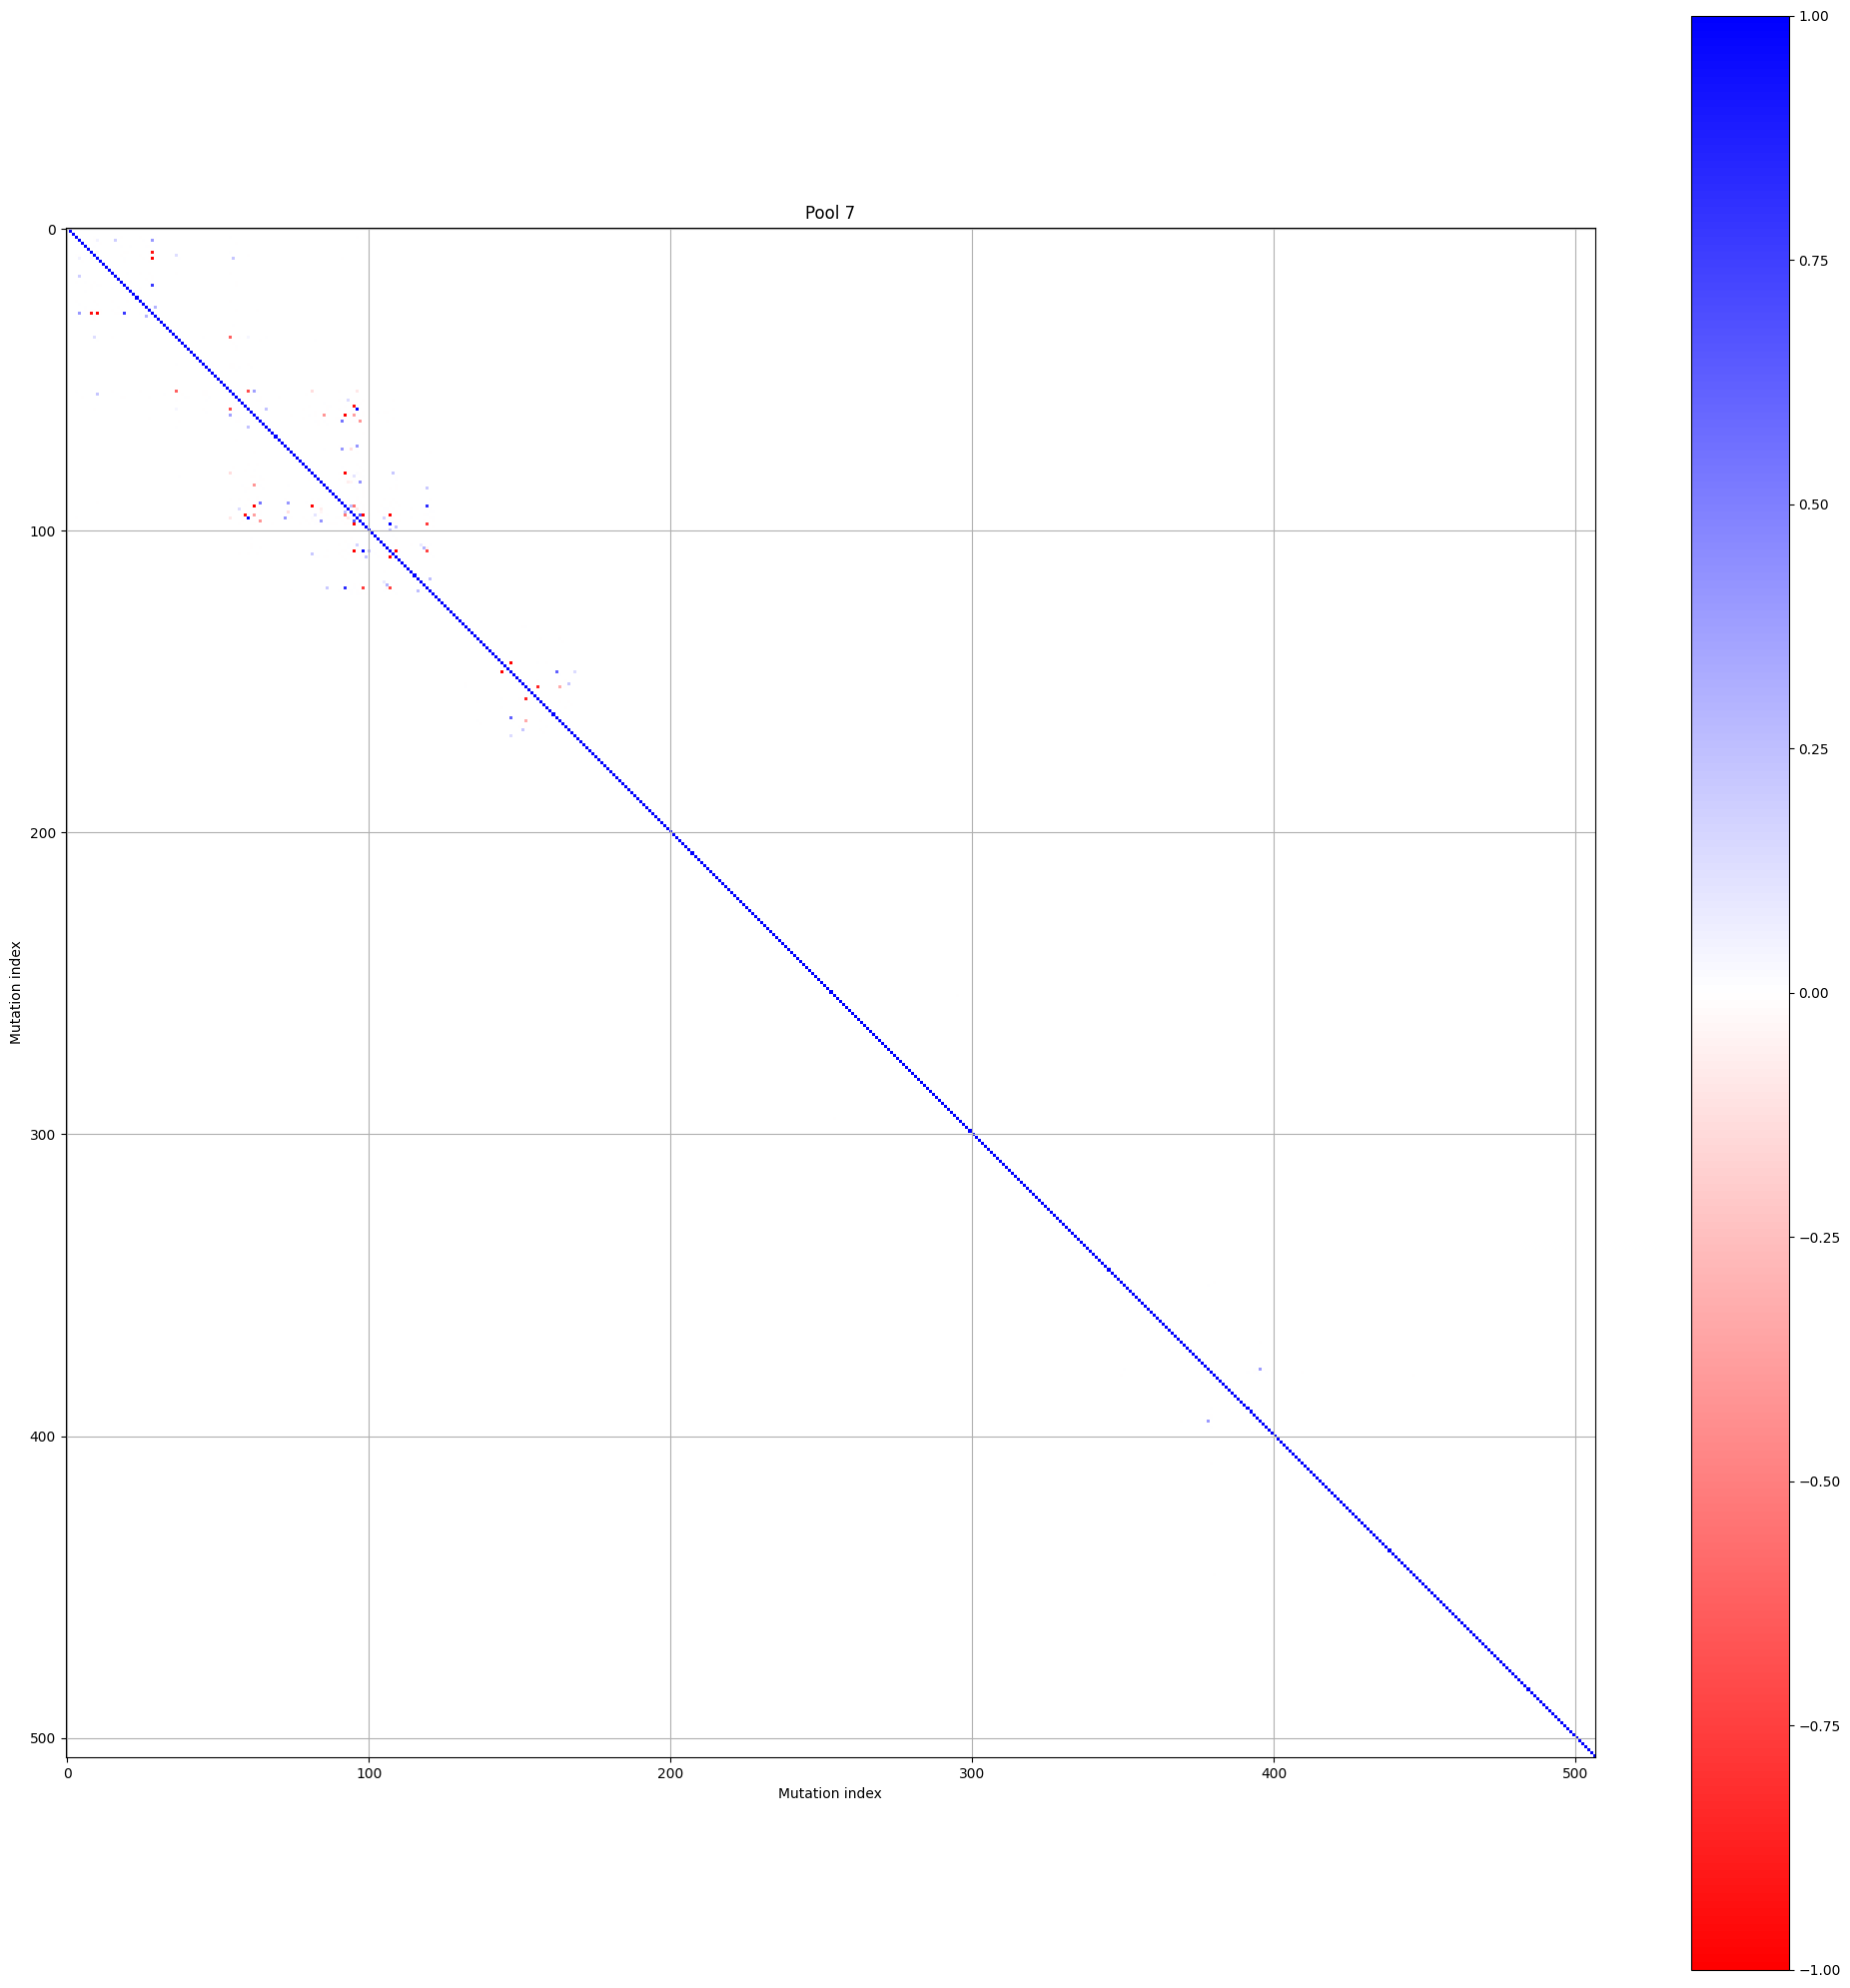

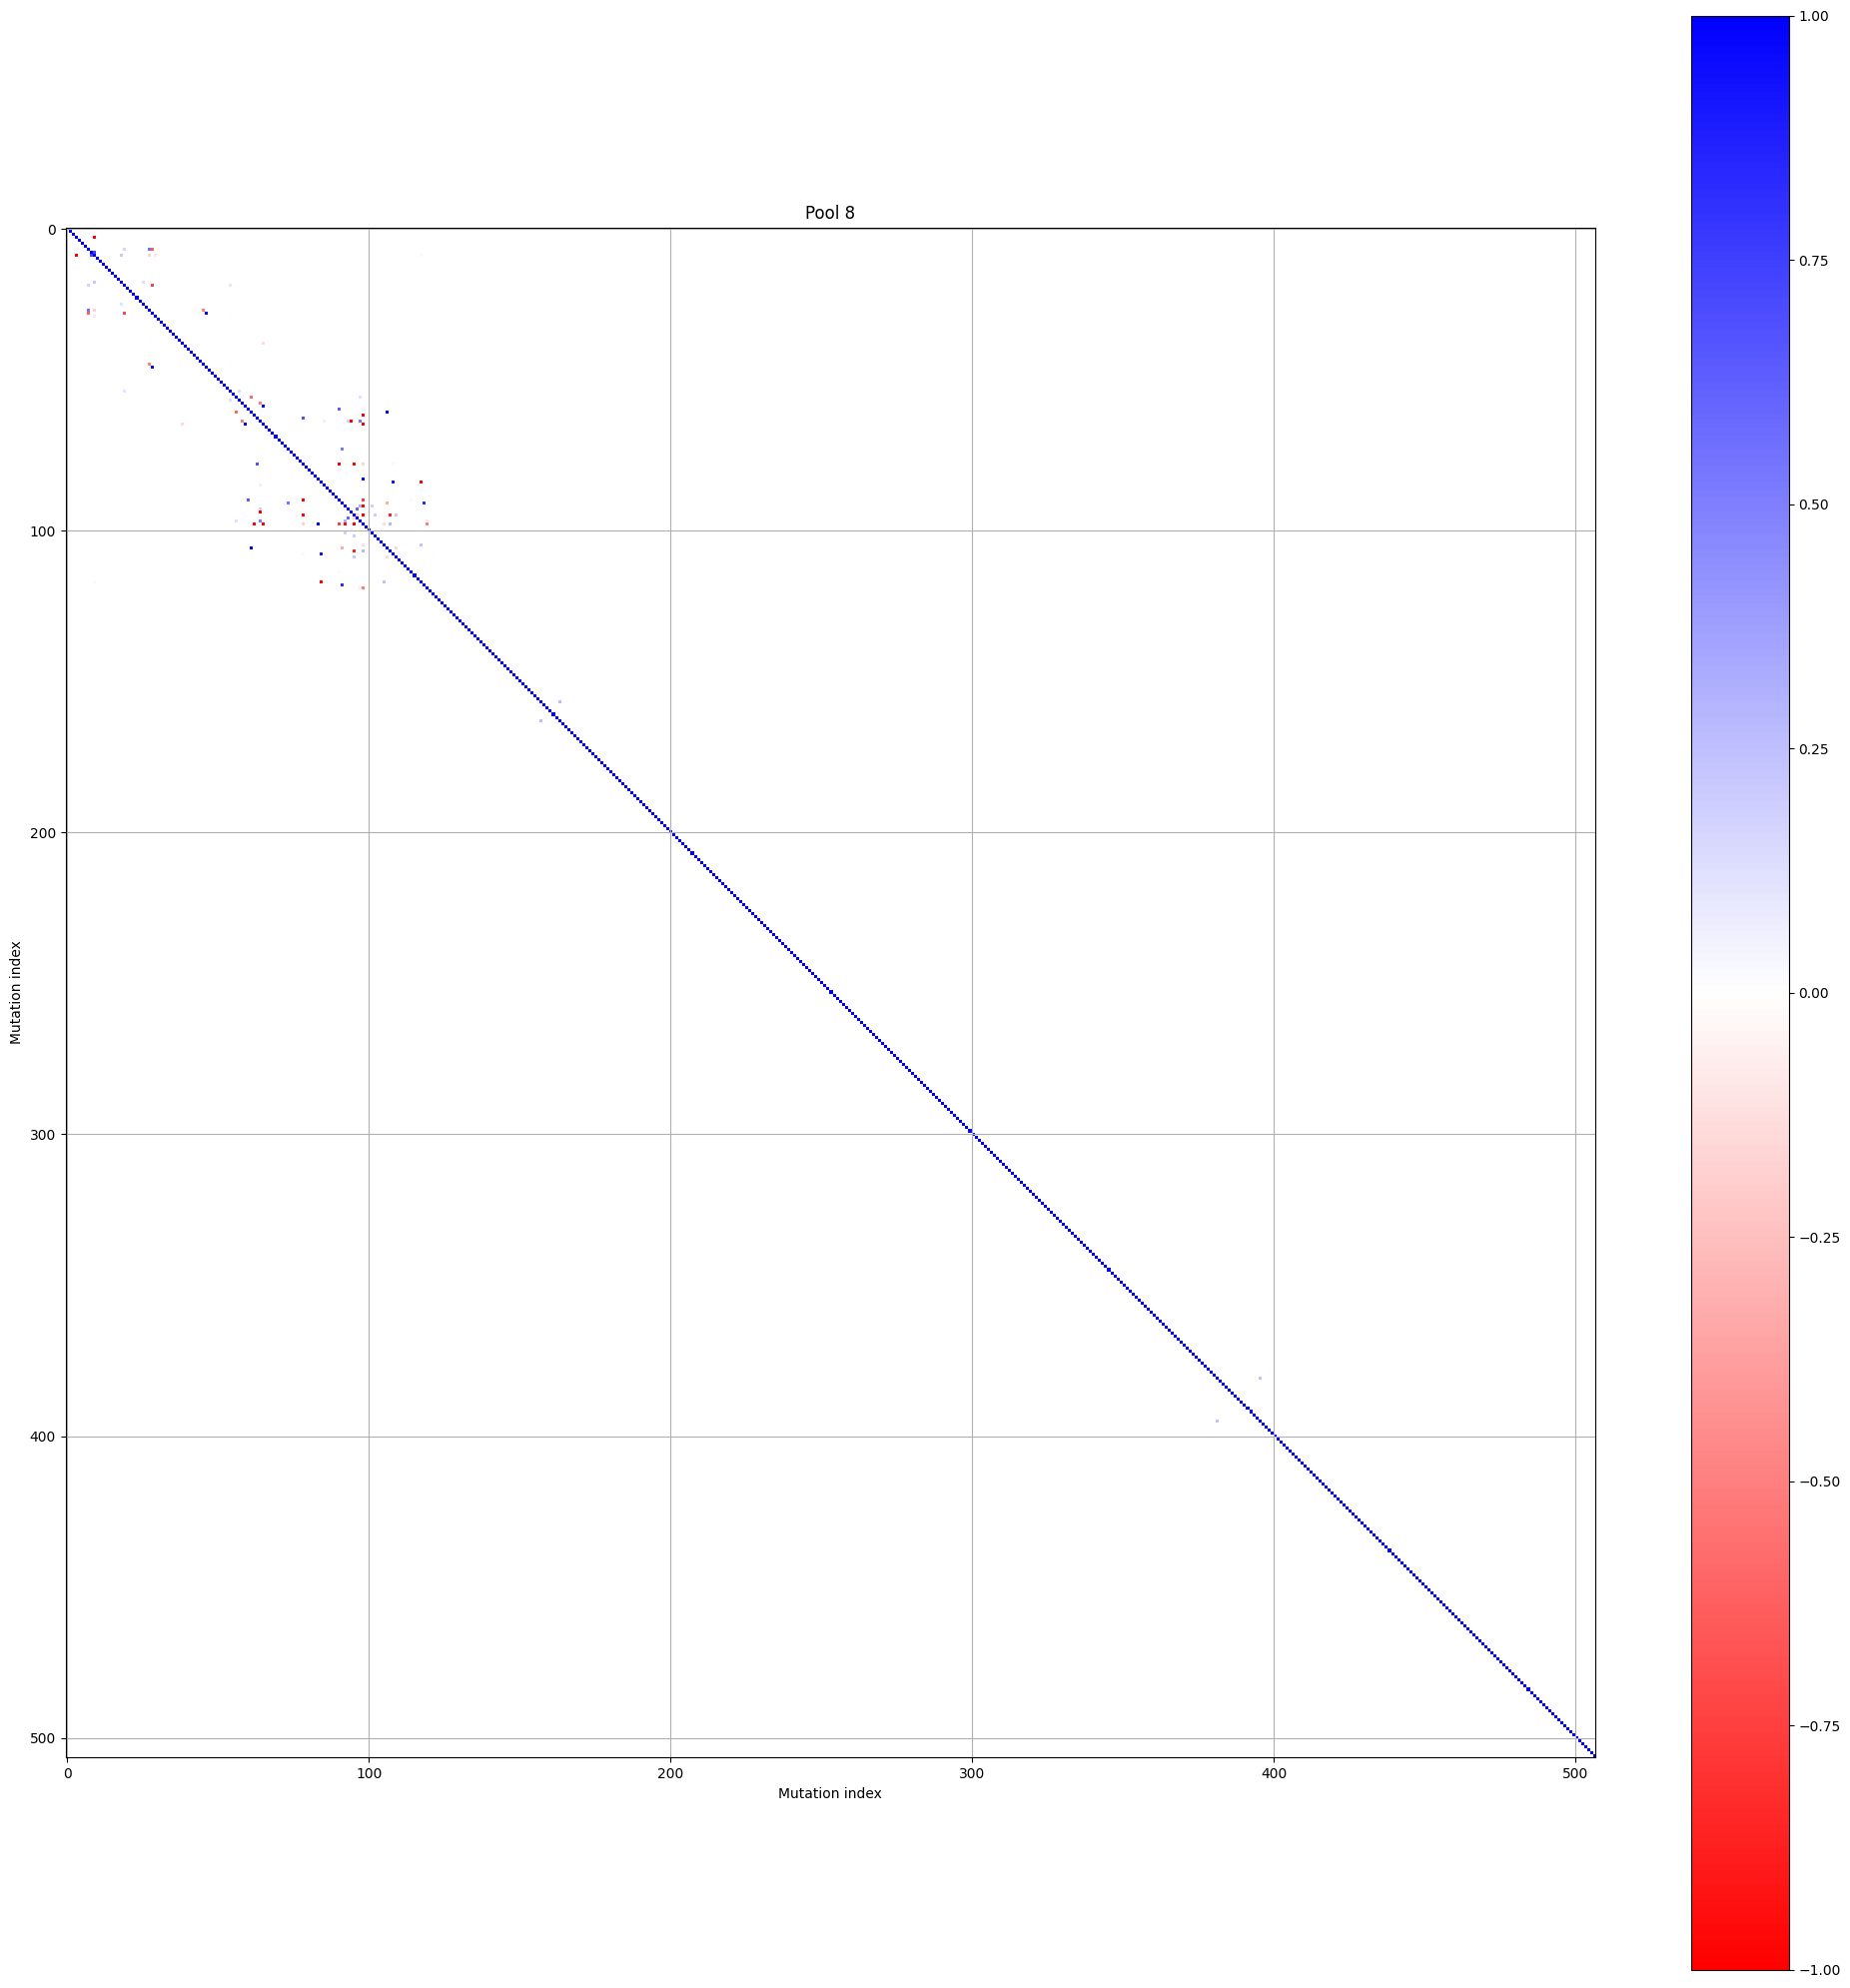

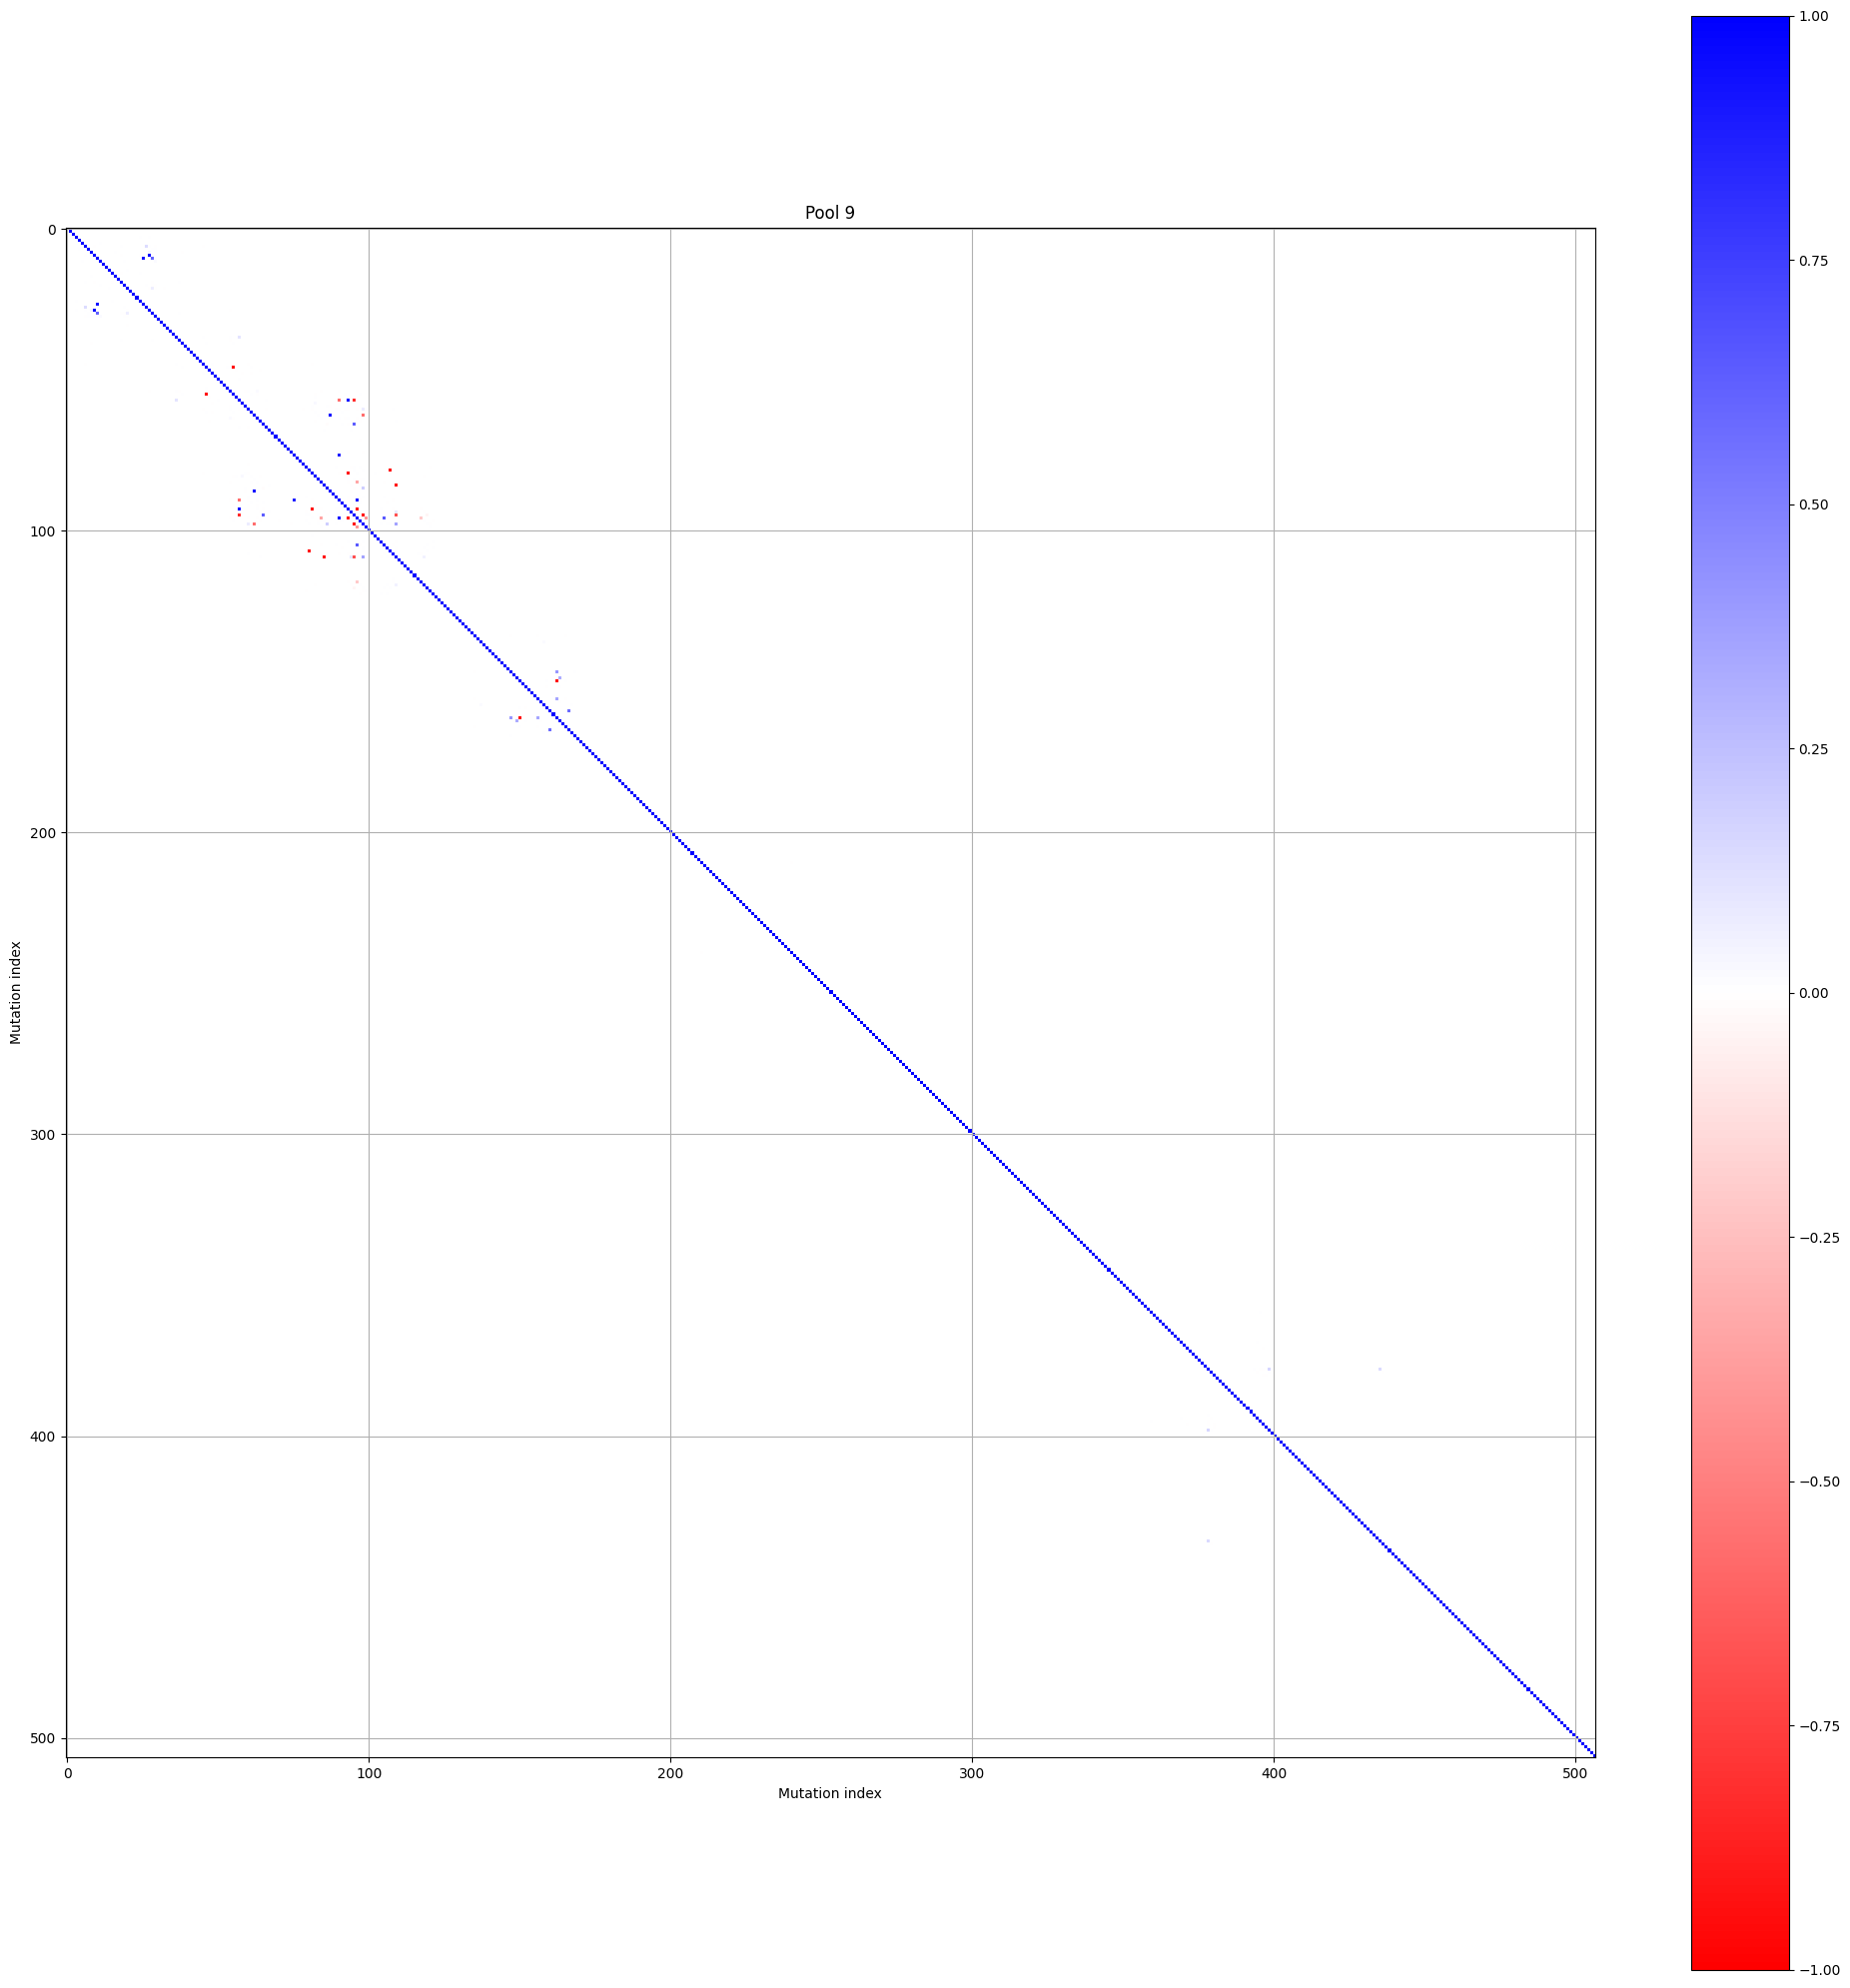

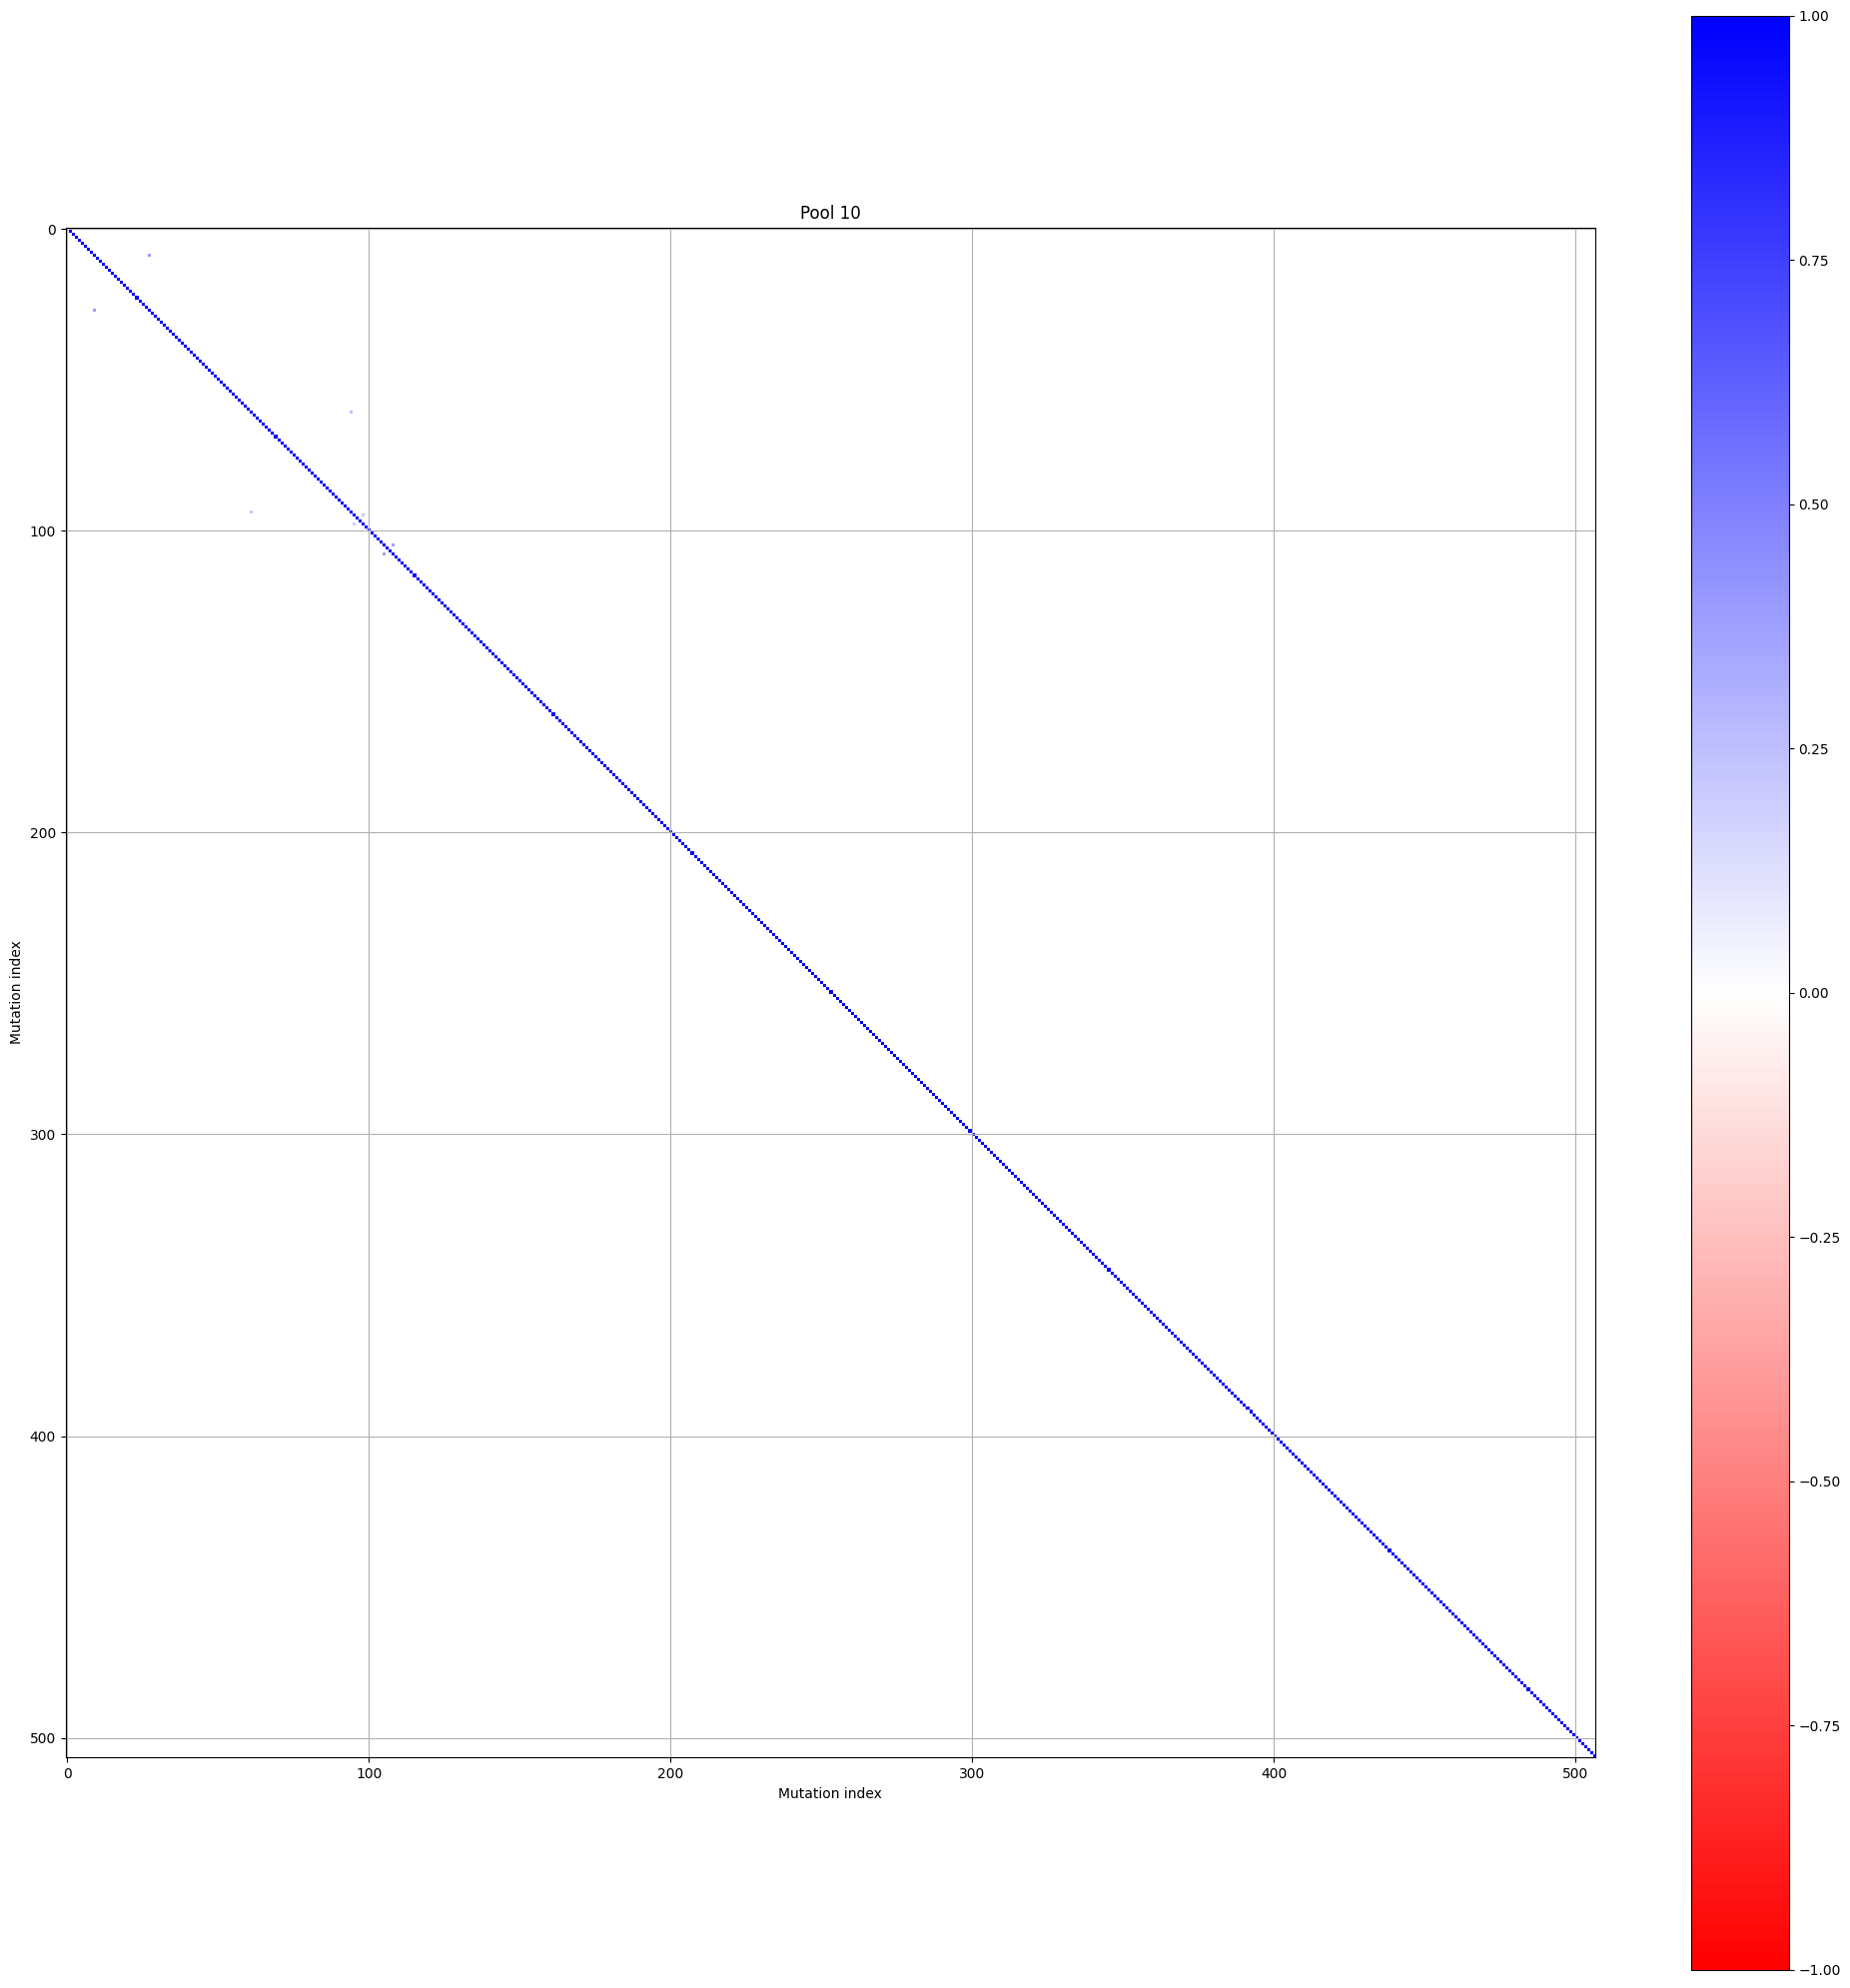

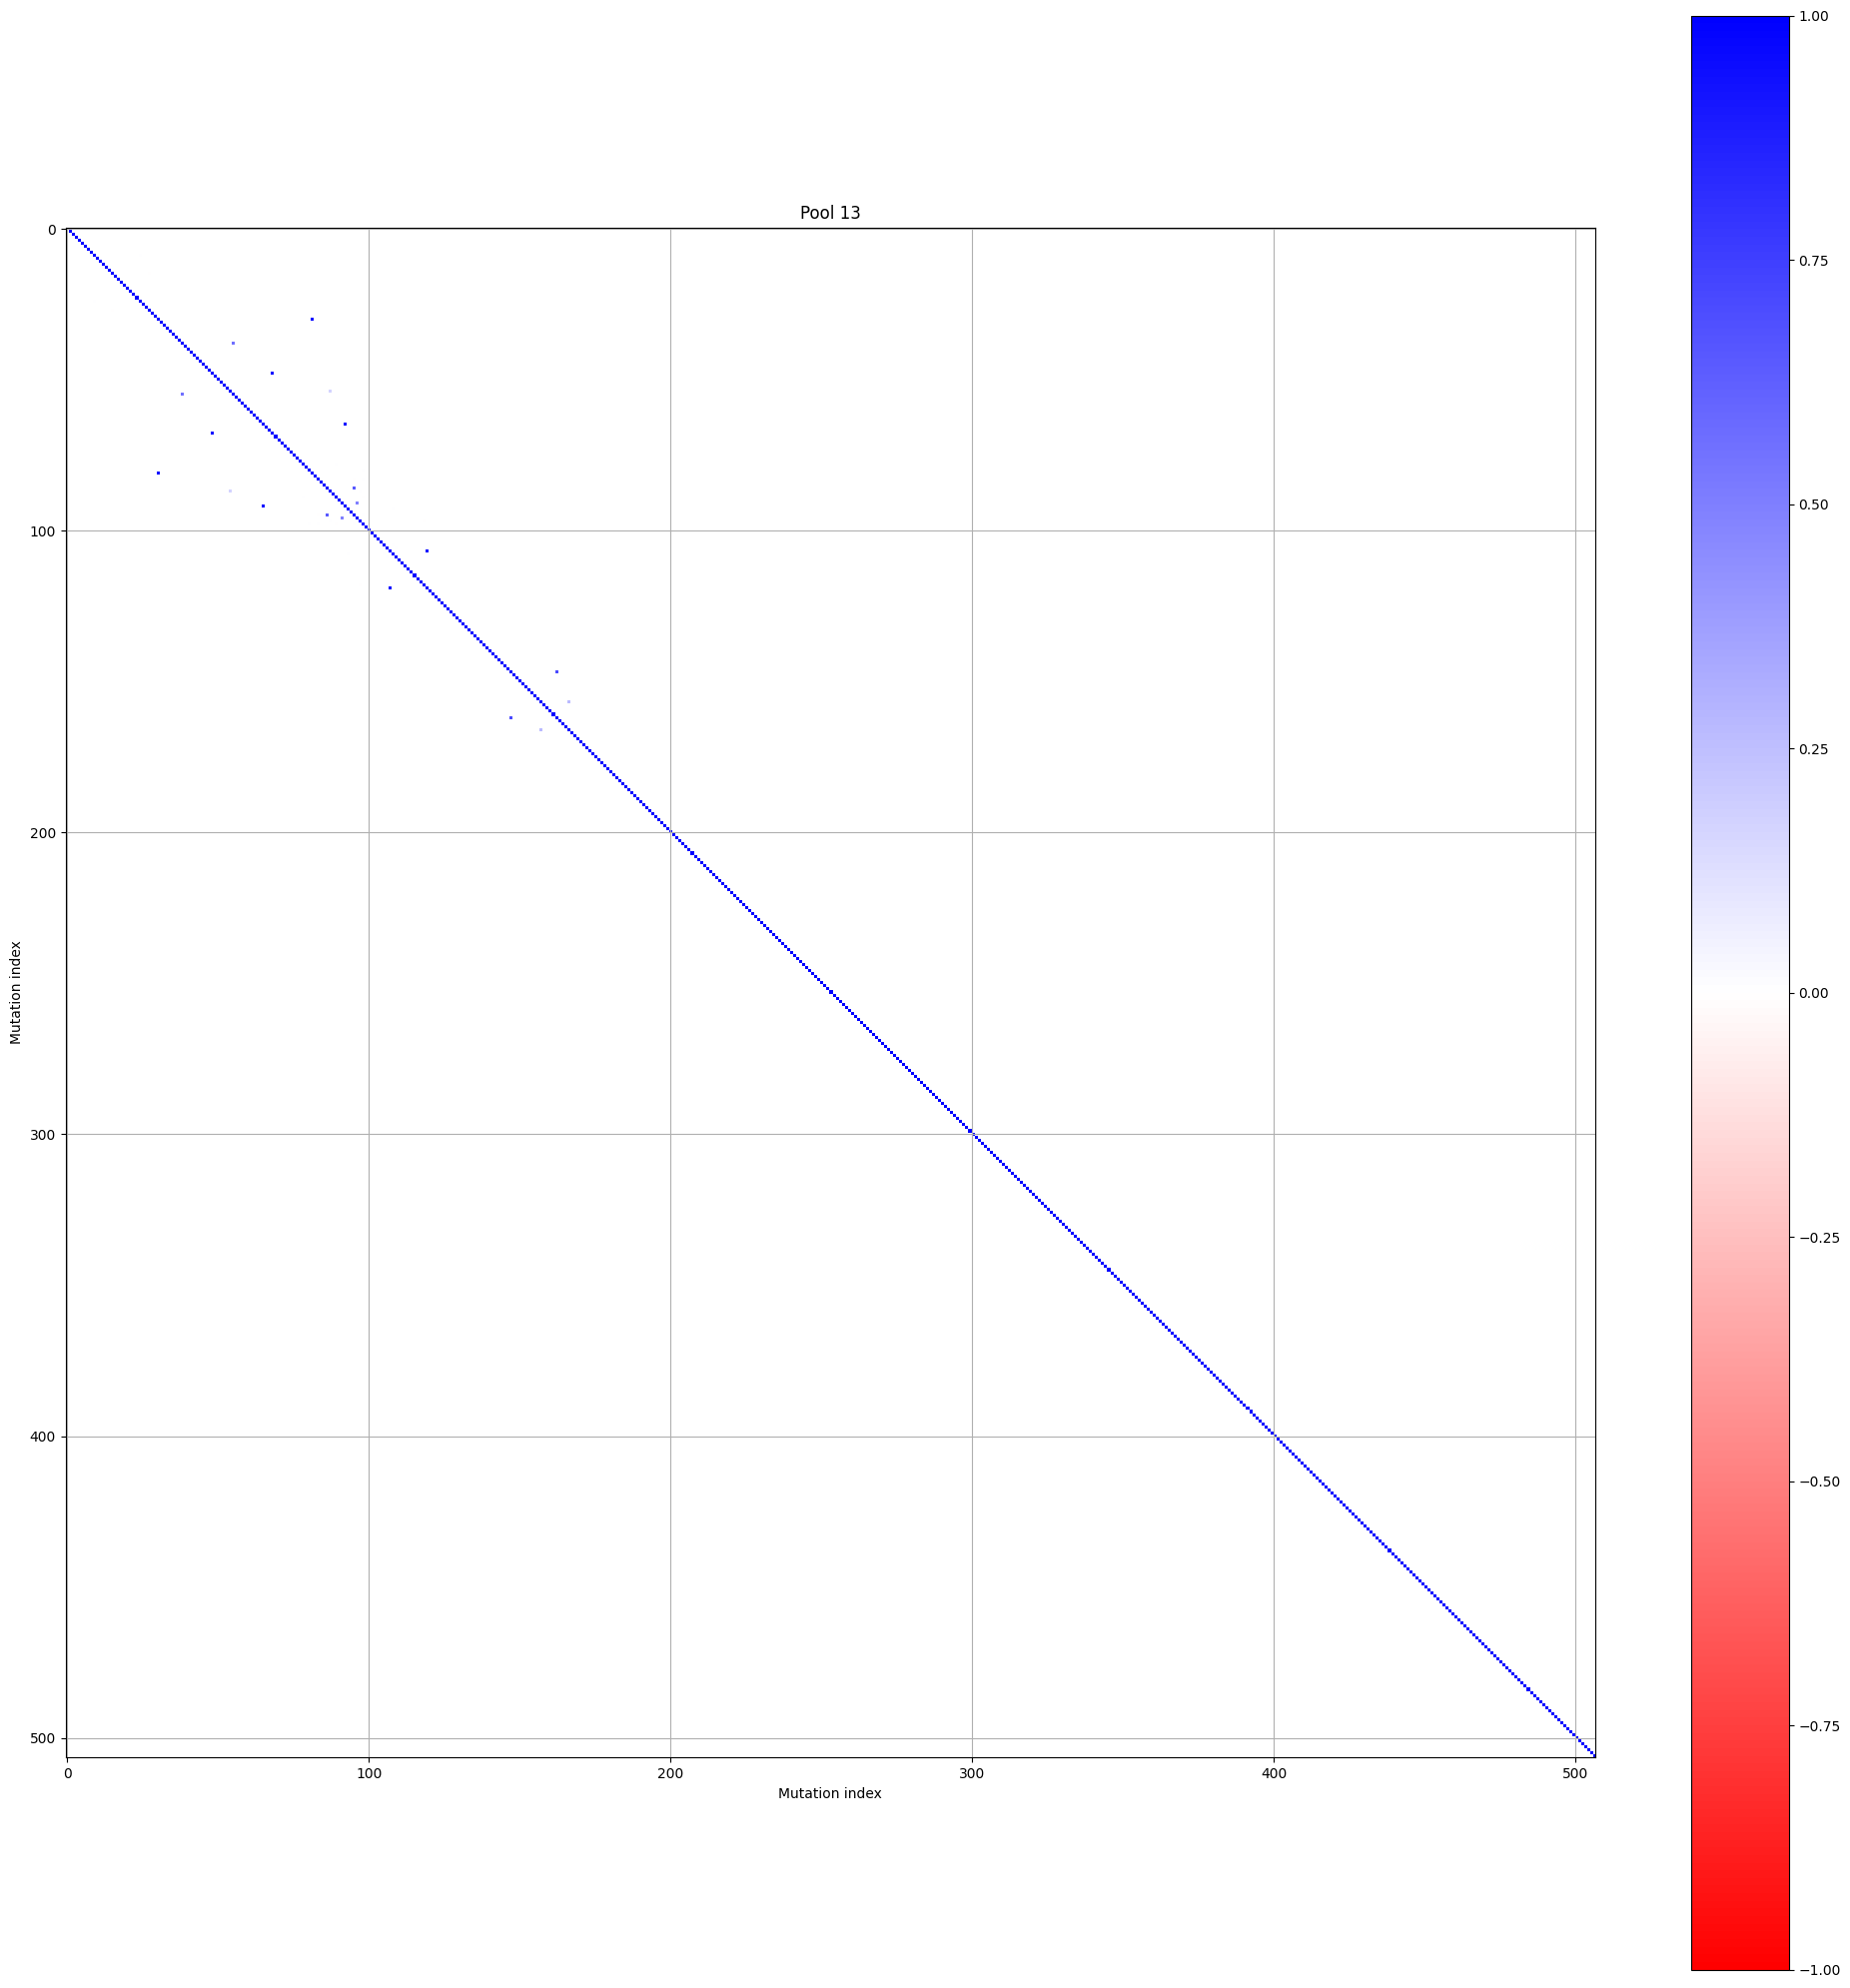

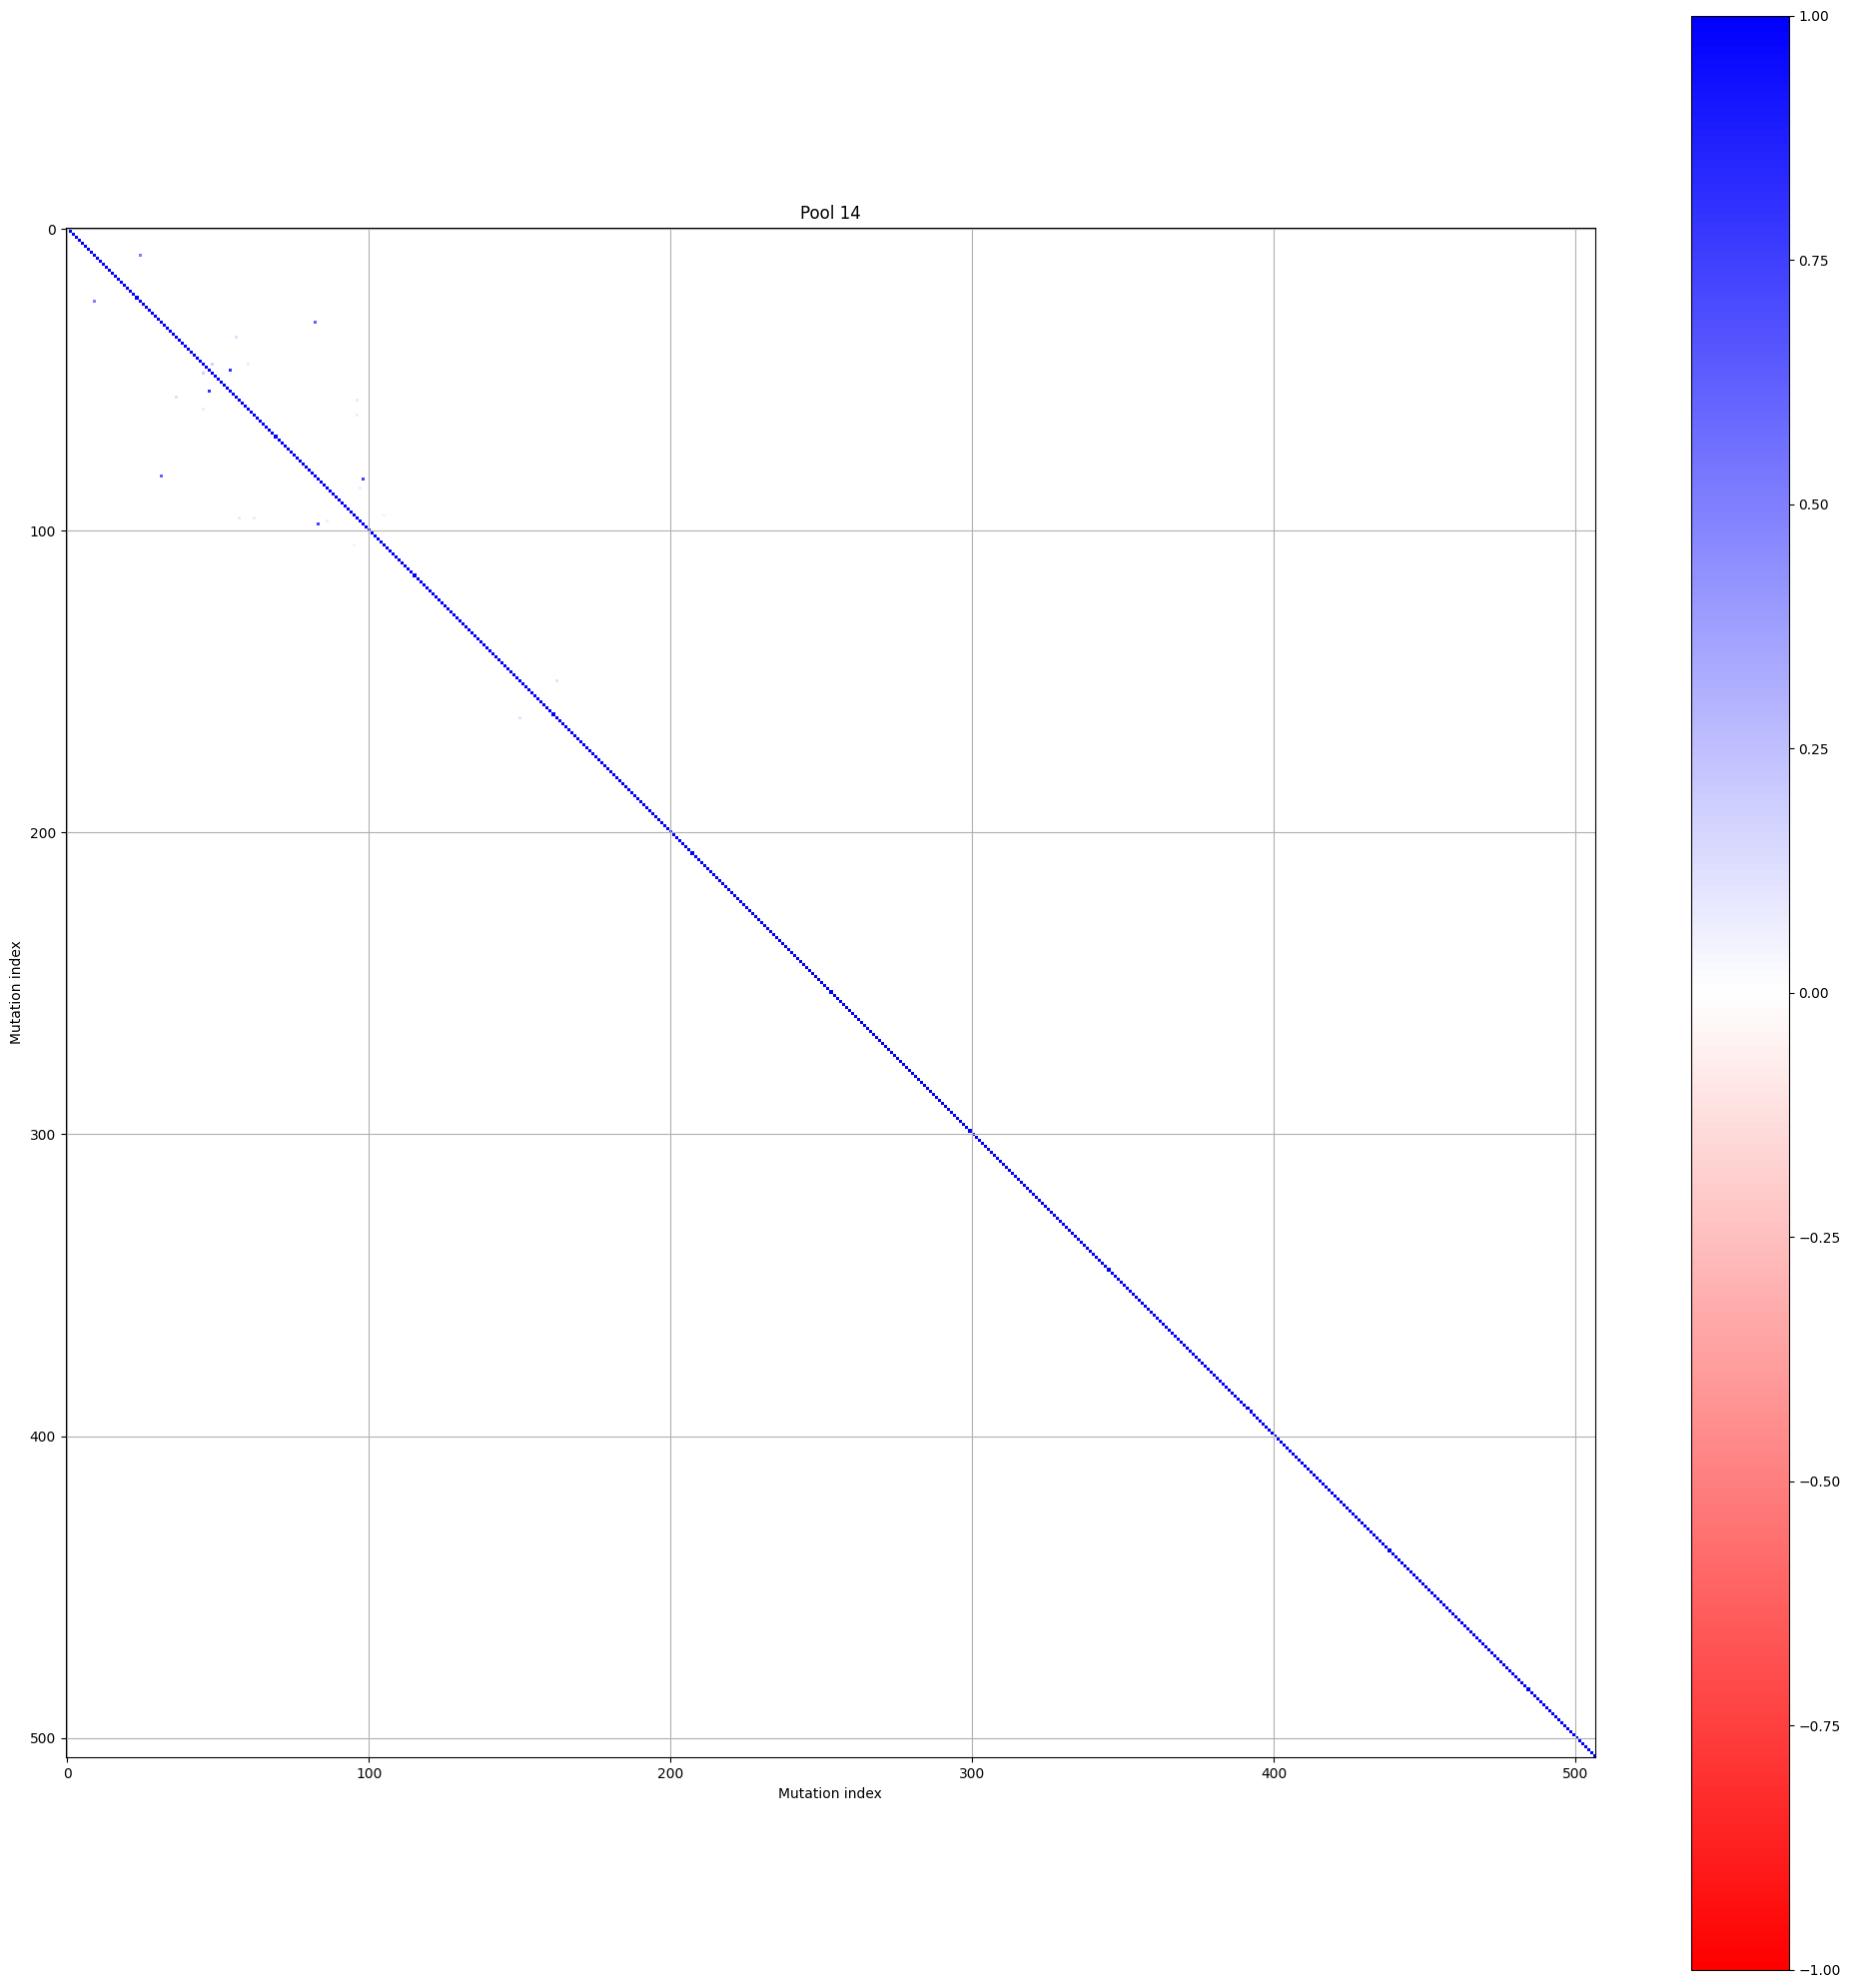

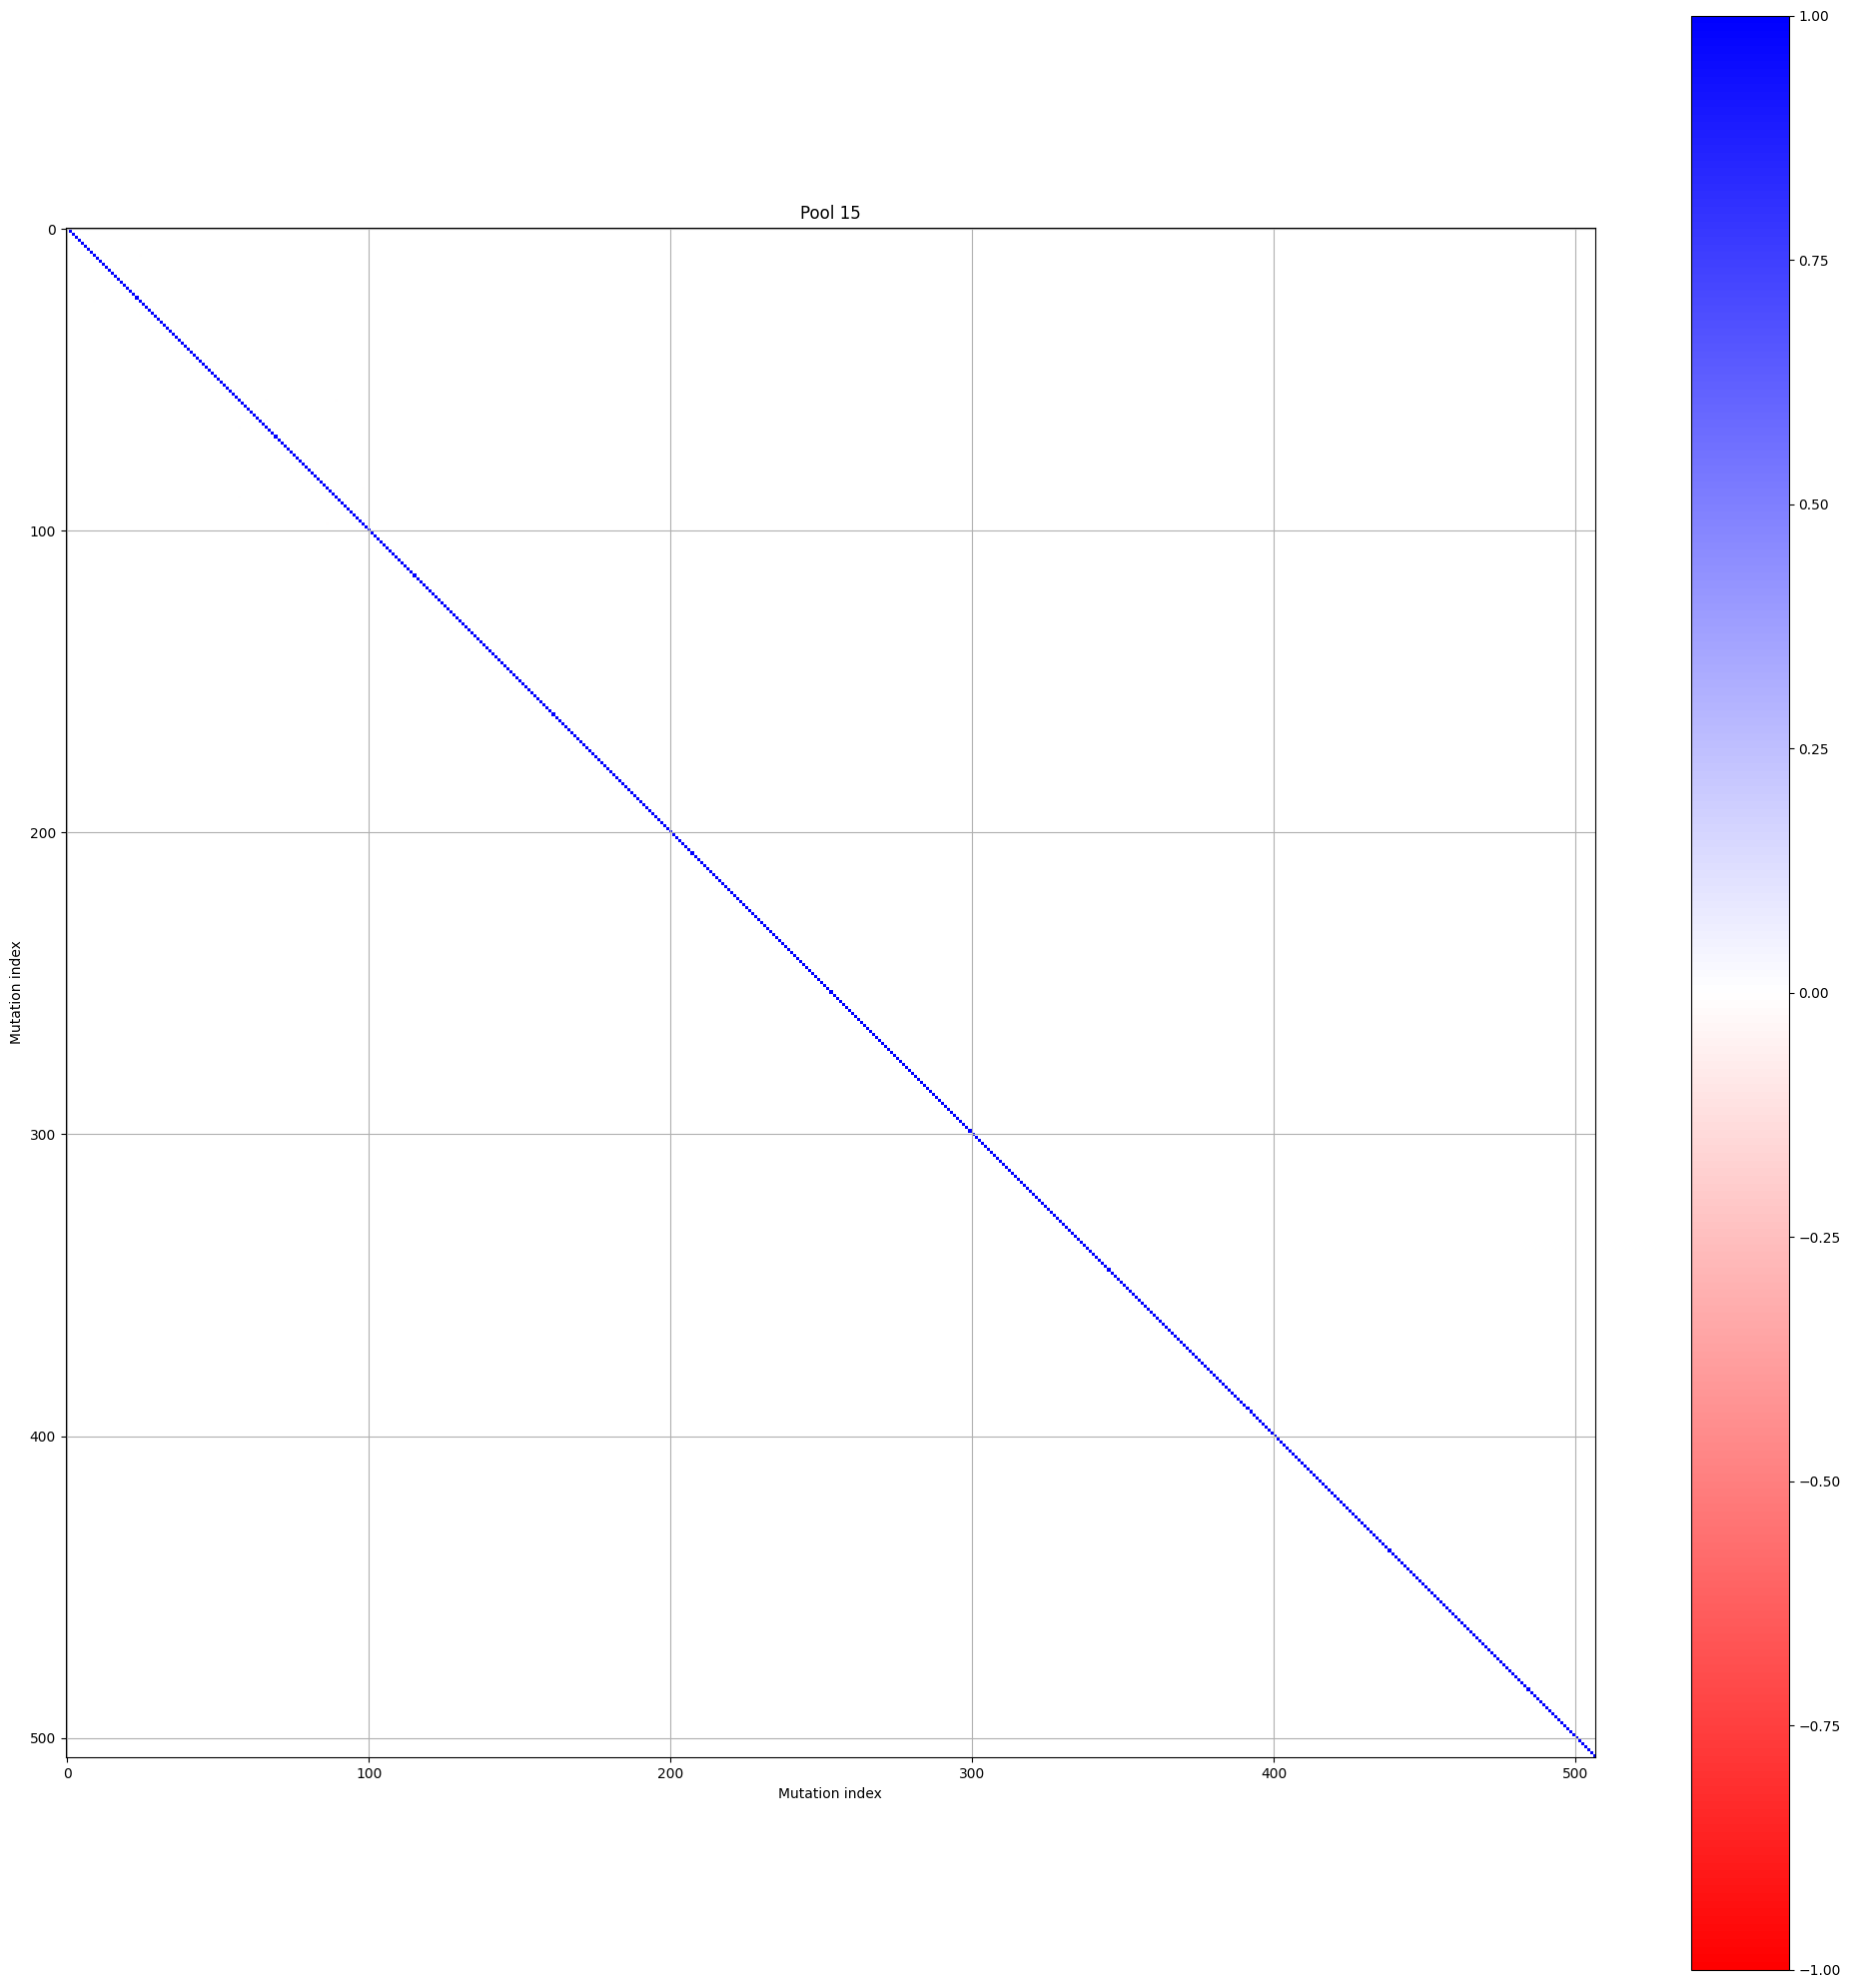

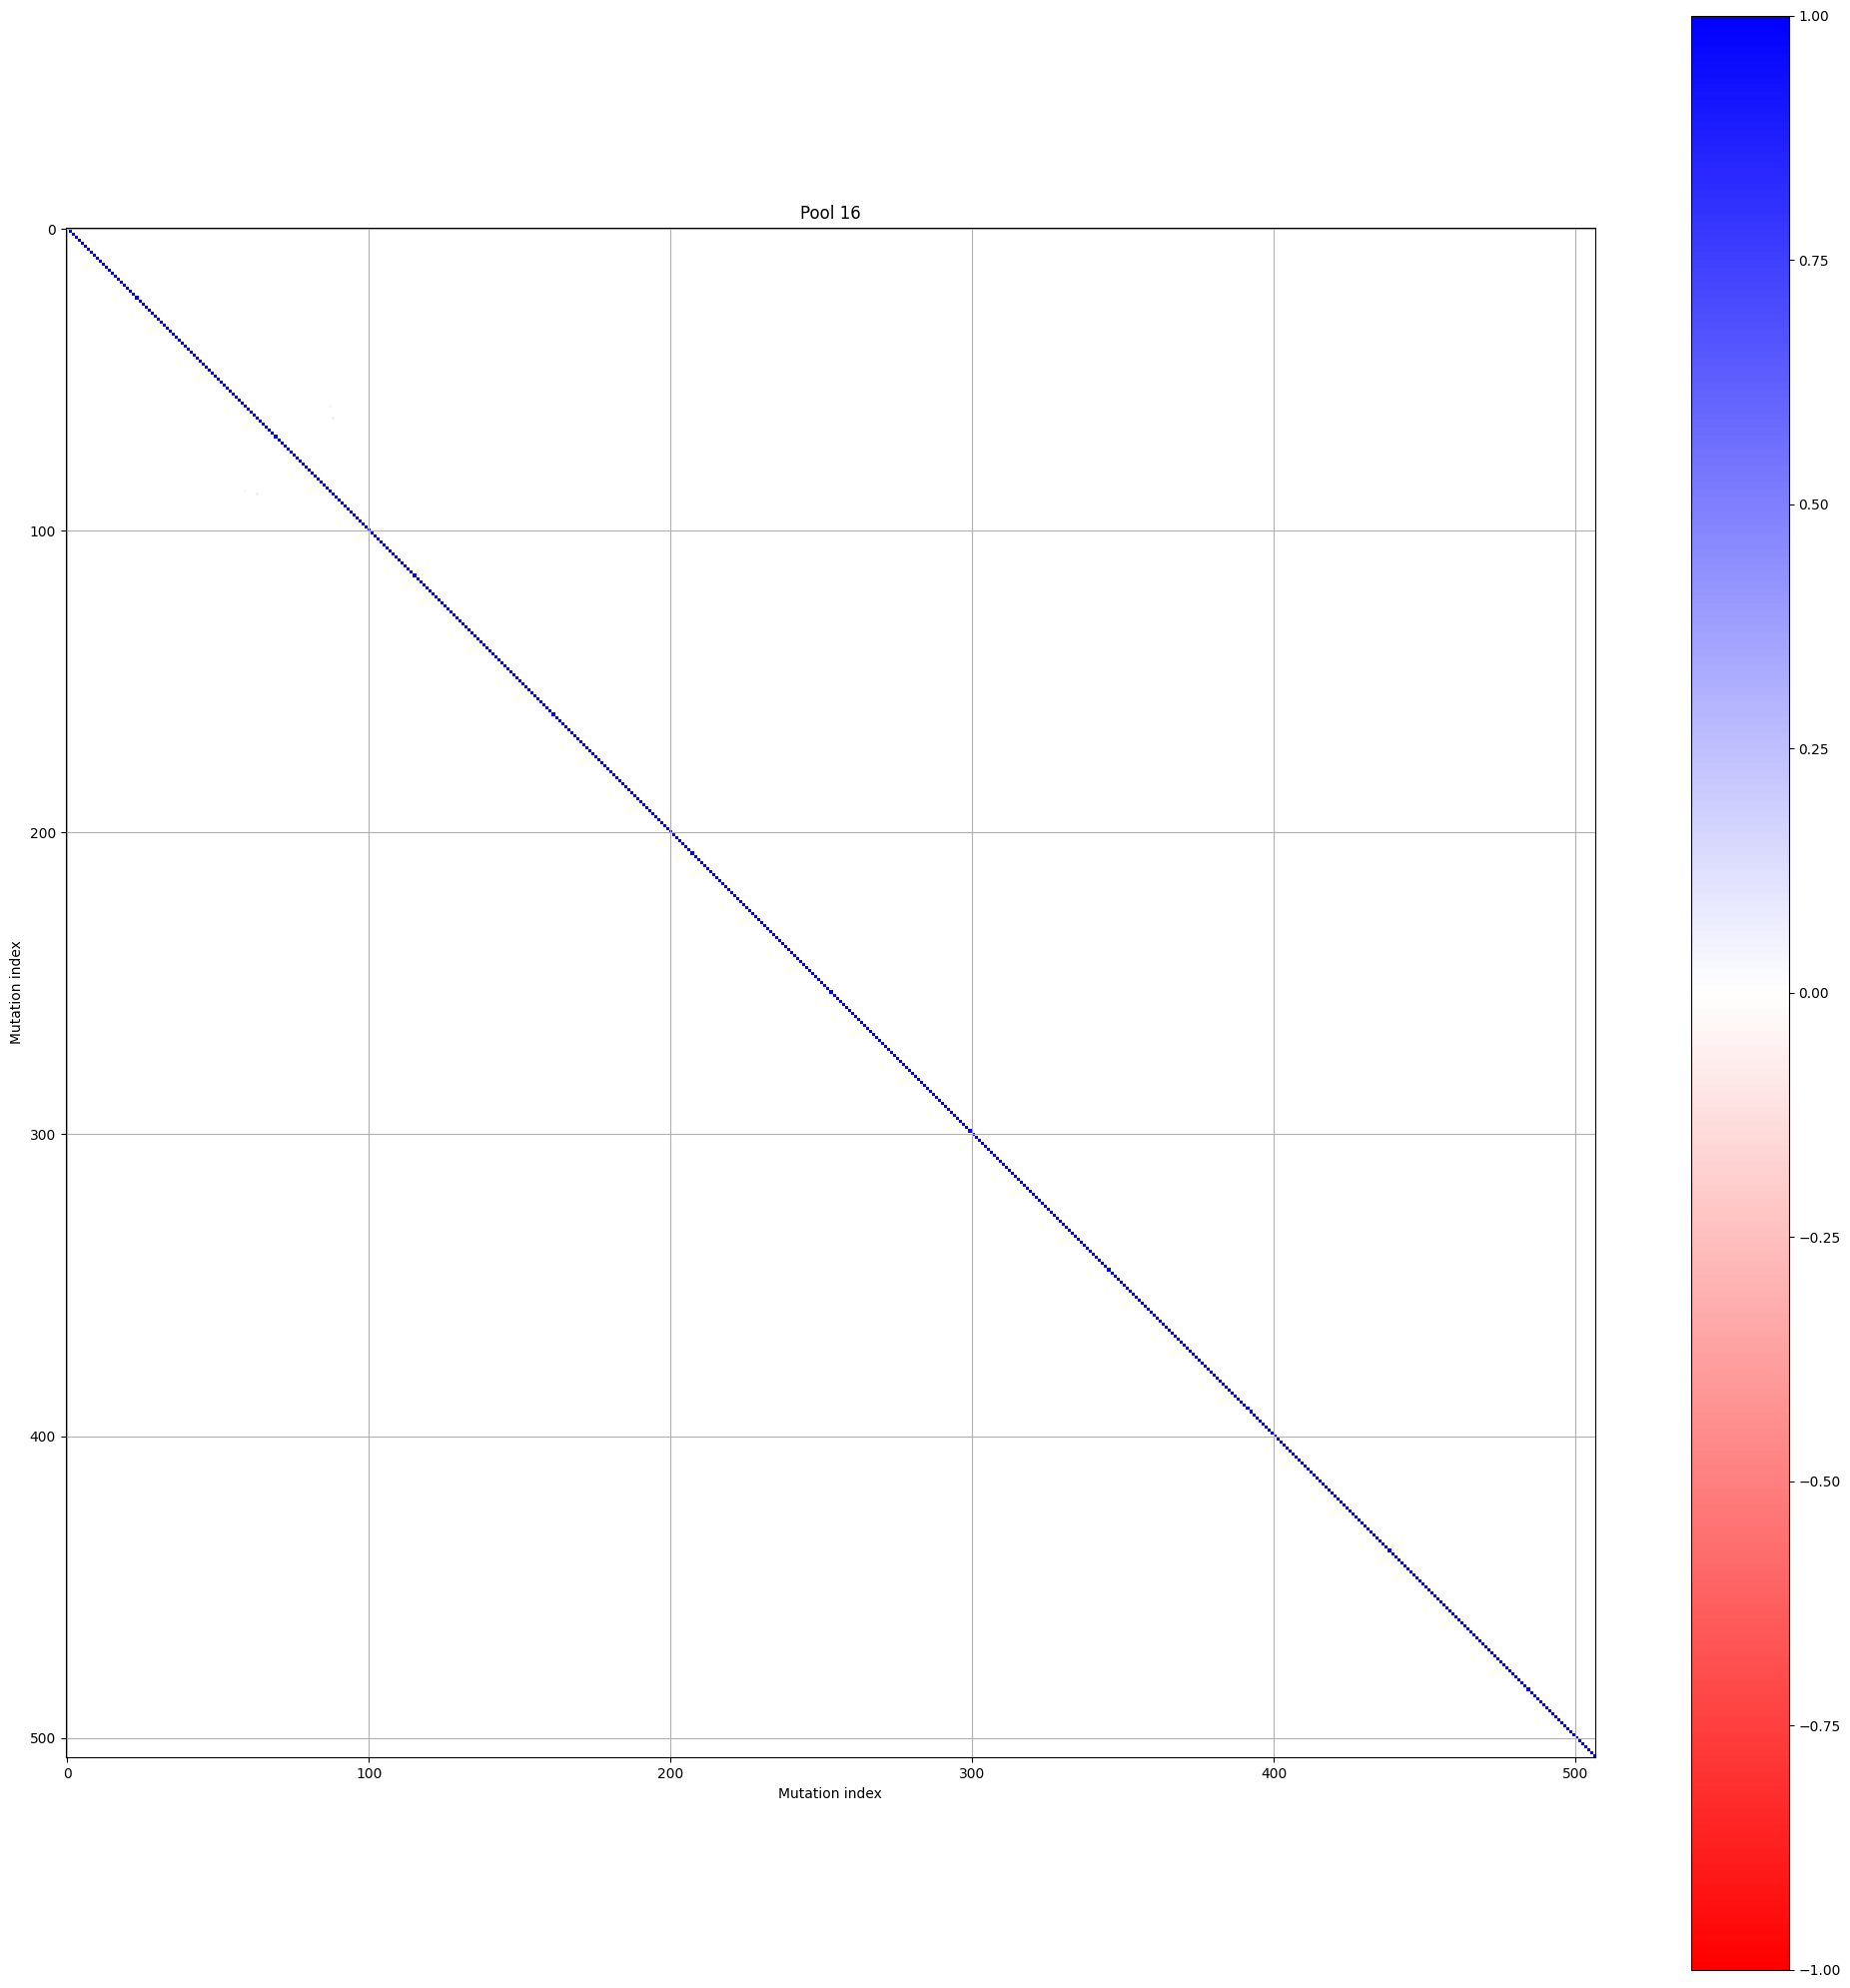

In [61]:
# plot interaction matrices for each pool
for i, pool in enumerate(interactions_r2):
    if i == 10 or i == 11:
        continue
    plt.figure(figsize=(20, 20))
    plt.imshow(pool, cmap='bwr_r', interpolation='nearest', clim=(-1, 1))
    plt.title(f'Pool {i+1}')
    plt.colorbar()
    plt.xlabel('Mutation index')
    plt.ylabel('Mutation index')
    plt.grid()
    plt.tight_layout()
    plt.show()